In [1]:
import numpy as np
import pandas as pd
import sys

try:
    if path:
        raise Exception('changed')
except:
    path = True
    sys.path.append('../')

from src.dataset import CarEvaluation, HayesRoth, Animals
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="white")

data_path = Path('../data')

%load_ext autoreload
%autoreload 2

The first dataset we run experiments on is the Animals dataset, where a complete analysis can be found in the specific notebook. We try to run experiments on the other datasets here in order to check whether the models are also able to perform correctly either for classfication of for clustering the data.

## 0. Animals dataset

Clustered data into 7 clusters
Estimated alpha: [0.16575761 0.07944395 0.37711099 0.03235856 0.17557662 0.07096657
 0.09878569]
Estimated mu: [[1 2 2 1 2 1 2 1 2 2 1 1 2 2 1 1]
 [1 1 2 1 2 1 1 1 1 2 1 1 5 1 1 1]
 [2 1 1 2 1 1 2 2 2 2 1 1 3 2 1 2]
 [1 2 2 1 2 1 1 1 2 2 1 1 2 2 2 1]
 [1 1 2 1 1 2 2 2 2 1 1 2 1 2 1 1]
 [1 1 2 1 1 2 2 2 2 2 1 1 3 2 1 1]
 [1 1 2 1 1 2 2 1 1 1 1 1 1 1 1 1]]
Estimated pi: [[0.95610425 0.95610425 0.95610425 0.95610425 0.51989026 0.30178326
  0.0877915  0.95610425 0.95610425 0.95610425 0.95610425 0.95610425
  0.95610425 0.95610425 0.95610425 0.30178326]
 [0.04389575 0.95610425 0.95610425 0.95610425 0.48010974 0.95610425
  0.74211248 0.95610425 0.95610425 0.95610425 0.48010974 0.95610425
  0.95610425 0.95610425 0.74211248 0.95610425]
 [0.95610425 0.95610425 0.95610425 0.95610425 0.89026063 0.85733882
  0.04389575 0.95610425 0.95610425 0.95610425 0.95610425 0.89026063
  0.81344307 0.66529492 0.56927298 0.51989026]
 [0.95610425 0.95610425 0.95610425 0.95610425 0.9

(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x2cee89050>,
 {'1.0': {'precision': 1.0,
   'recall': 0.9512195121951219,
   'f1-score': 0.975,
   'support': 41.0},
  '2.0': {'precision': 1.0,
   'recall': 0.65,
   'f1-score': 0.787878787878788,
   'support': 20.0},
  '3.0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 5.0},
  '4.0': {'precision': 0.8125,
   'recall': 1.0,
   'f1-score': 0.896551724137931,
   'support': 13.0},
  '5.0': {'precision': 0.6666666666666666,
   'recall': 1.0,
   'f1-score': 0.8,
   'support': 4.0},
  '6.0': {'precision': 0.5714285714285714,
   'recall': 1.0,
   'f1-score': 0.7272727272727273,
   'support': 8.0},
  '7.0': {'precision': 0.6666666666666666,
   'recall': 0.4,
   'f1-score': 0.5,
   'support': 10.0},
  'accuracy': 0.801980198019802,
  'macro avg': {'precision': 0.6738945578231293,
   'recall': 0.7144599303135889,
   'f1-score': 0.6695290341842066,
   'support': 101.0},
  'weighted avg': {'precision': 0.8462105

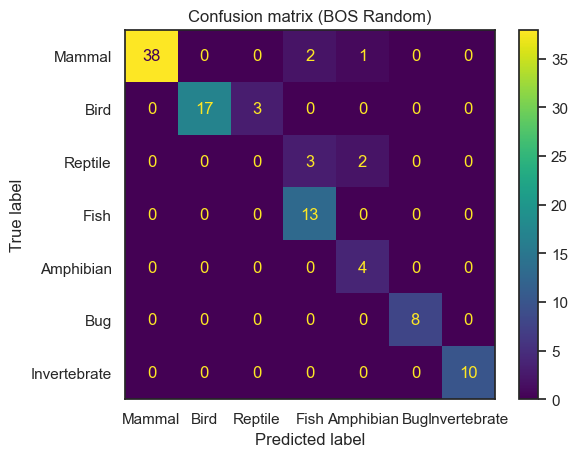

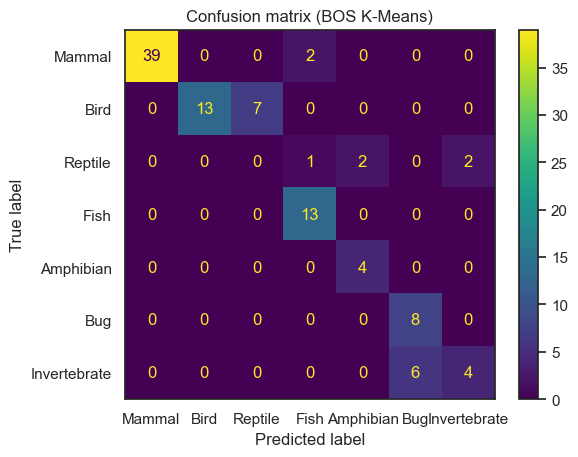

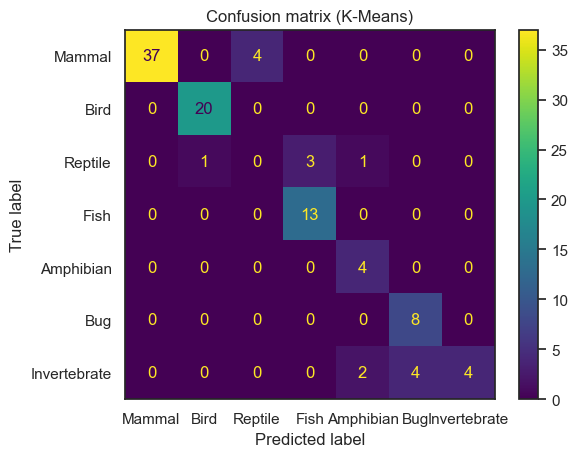

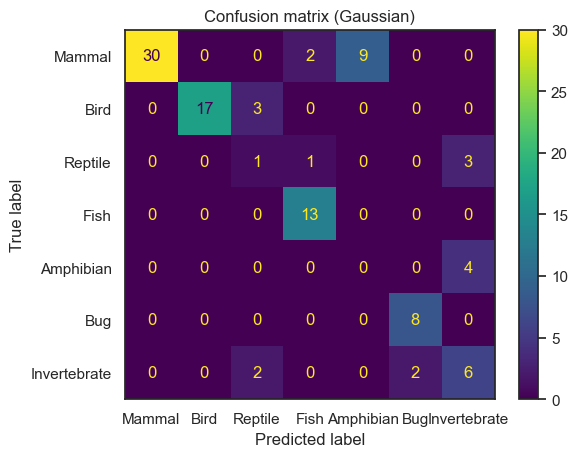

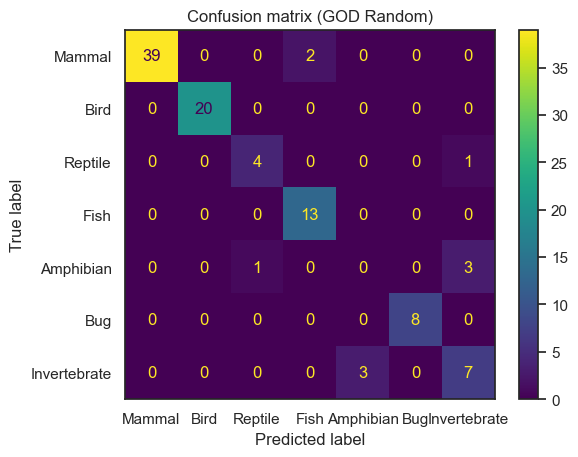

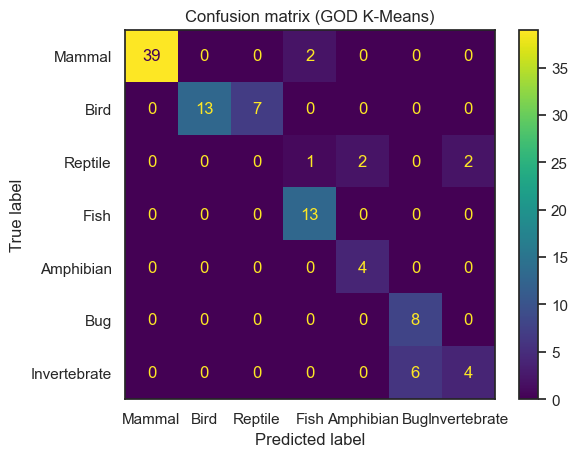

In [2]:
animals = Animals(data_path.joinpath('zoo.csv'), data_path.joinpath('zoo_target.csv'))
animals.cluster_bos(init="random")
animals.classification_results()

animals.cluster_bos(init="kmeans")
animals.classification_results()

animals.cluster_kmeans()
animals.classification_results()


animals.cluster_gaussian()
animals.classification_results()

animals.cluster_god(init="random")
animals.classification_results()

animals.cluster_god(init="kmeans")
animals.classification_results()

## 1. Car Evaluation Dataset

Since this dataset has a lot of observations and the algorithm is not able to handle it, we decided to take a sample of the dataset and run the experiments on it, which is shuffled.

In [3]:
car = CarEvaluation(data_path.joinpath('car_evaluation.csv'))
car.compute_Xy(n=250)
# car.compute_Xy(n=250)

print(f"Number of samples: {car.X.shape[0]}")
print(f"Number of clusters: {car.n_clusters}")
print(f"Number of features: {car.X.shape[1]}")
print(f"Number of unique values per feature: {car.m}")

car.cluster_bos()

Number of samples: 250
Number of clusters: 4
Number of features: 6
Number of unique values per feature: [4 4 4 3 3 3]
Clustered data into 4 clusters
Estimated alpha: [0.12415361 0.21832361 0.32351862 0.33400416]
Estimated mu: [[4 2 2 1 2 3]
 [3 1 3 3 1 1]
 [1 3 1 2 3 1]
 [3 4 4 1 1 2]]
Estimated pi: [[0.23593964 0.10973937 0.40877915 0.3648834  0.76406036 0.2085048 ]
 [0.33470508 0.04389575 0.14266118 0.25788752 0.2085048  0.04389575]
 [0.2085048  0.04389575 0.14266118 0.25788752 0.54183813 0.2085048 ]
 [0.10973937 0.10973937 0.10973937 0.2085048  0.0877915  0.33470508]]


array([3, 3, 1, 4, 4, 4, 4, 3, 4, 1, 3, 4, 3, 3, 3, 4, 2, 4, 4, 2, 1, 4,
       3, 3, 3, 4, 4, 2, 3, 2, 1, 4, 3, 4, 3, 2, 2, 3, 3, 2, 4, 1, 4, 3,
       4, 3, 2, 3, 3, 4, 4, 2, 3, 4, 4, 4, 2, 2, 2, 3, 3, 4, 2, 4, 3, 3,
       3, 3, 3, 3, 3, 4, 1, 1, 3, 3, 4, 3, 3, 4, 1, 4, 3, 3, 3, 3, 3, 4,
       4, 3, 4, 3, 3, 4, 4, 4, 1, 4, 3, 2, 3, 1, 3, 3, 4, 1, 1, 3, 4, 3,
       4, 4, 4, 4, 2, 2, 3, 3, 1, 1, 3, 3, 1, 4, 4, 4, 1, 3, 3, 3, 4, 3,
       2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 3, 3, 1, 3, 3, 4, 4, 4, 4, 3, 4, 4,
       3, 4, 2, 1, 4, 3, 4, 4, 2, 3, 4, 2, 4, 1, 4, 3, 4, 4, 4, 1, 4, 4,
       4, 3, 4, 1, 3, 1, 4, 2, 3, 3, 3, 3, 3, 4, 3, 4, 2, 3, 3, 4, 2, 2,
       1, 3, 4, 4, 4, 3, 4, 2, 1, 1, 3, 3, 1, 4, 2, 3, 4, 4, 3, 4, 2, 3,
       3, 4, 3, 3, 3, 4, 2, 4, 3, 4, 4, 2, 2, 4, 3, 4, 2, 3, 3, 1, 1, 2,
       3, 3, 4, 1, 3, 4, 4, 2])

In [4]:
print(f"Estimated alpha: {car.ordinal_clustering.alphas}")
print(f"Estimated mu: {car.ordinal_clustering.mus}")
print(f"Estimated pi: {car.ordinal_clustering.pis}")

Estimated alpha: [0.12415361 0.21832361 0.32351862 0.33400416]
Estimated mu: [[4 2 2 1 2 3]
 [3 1 3 3 1 1]
 [1 3 1 2 3 1]
 [3 4 4 1 1 2]]
Estimated pi: [[0.23593964 0.10973937 0.40877915 0.3648834  0.76406036 0.2085048 ]
 [0.33470508 0.04389575 0.14266118 0.25788752 0.2085048  0.04389575]
 [0.2085048  0.04389575 0.14266118 0.25788752 0.54183813 0.2085048 ]
 [0.10973937 0.10973937 0.10973937 0.2085048  0.0877915  0.33470508]]


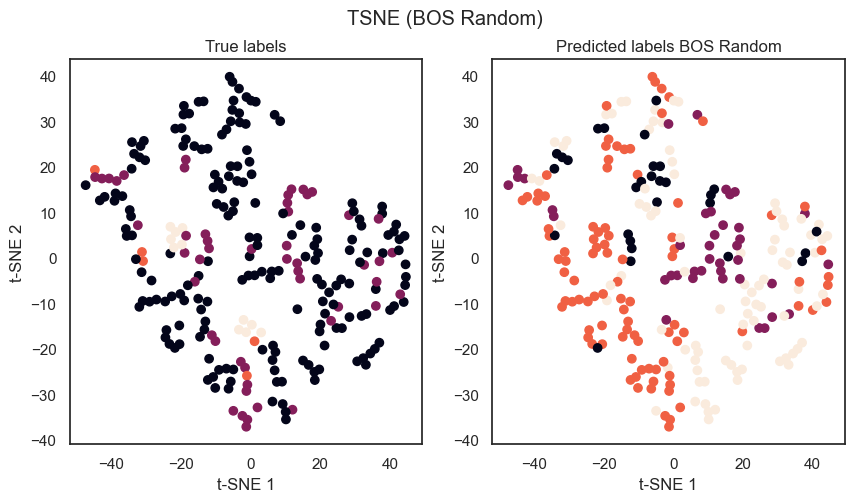

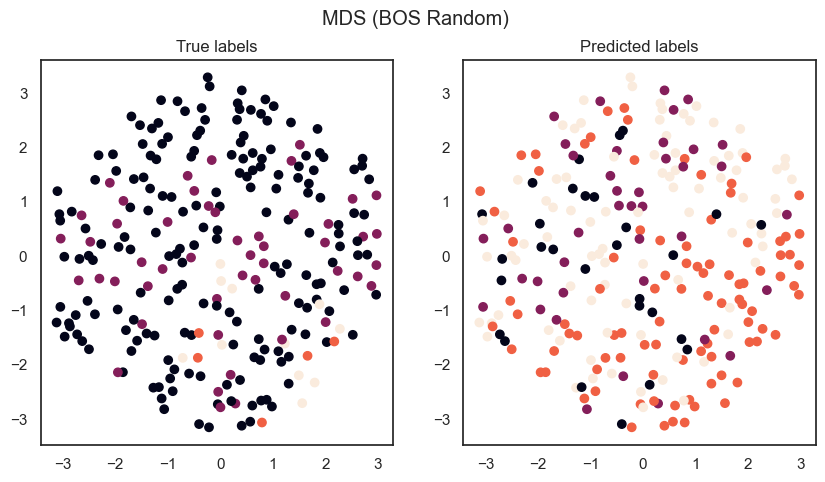

In [5]:
car.plot_tsne()
car.plot_mds()

After plotting the data in a lower dimensional space using both t-SNE and MDS, we can see first that clustering the dataset using the features is not an easy task because it doesn't seem to have a clear structure. We also notice that the BOS model is struggling to separate correctly the data. This can also be captured using the classification scores and the assignment matrix in the following cells.

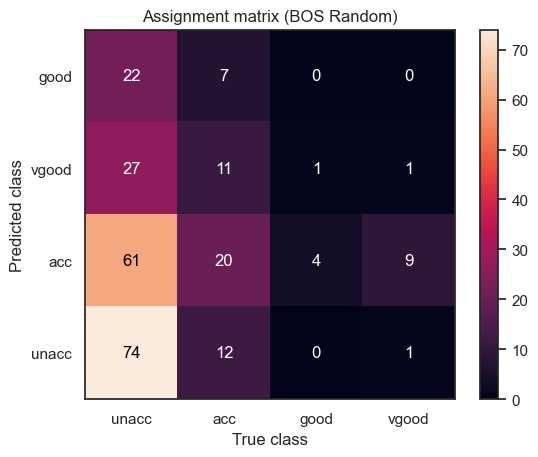

In [6]:
car.plot_assignment_matrix()

              precision    recall  f1-score   support

           1       0.85      0.40      0.55       184
           2       0.21      0.40      0.28        50
           3       0.00      0.00      0.00         5
           4       0.03      0.09      0.04        11

    accuracy                           0.38       250
   macro avg       0.27      0.22      0.22       250
weighted avg       0.67      0.38      0.46       250



(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x2cf298950>,
 {'1': {'precision': 0.8505747126436781,
   'recall': 0.40217391304347827,
   'f1-score': 0.5461254612546126,
   'support': 184.0},
  '2': {'precision': 0.2127659574468085,
   'recall': 0.4,
   'f1-score': 0.27777777777777785,
   'support': 50.0},
  '3': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 5.0},
  '4': {'precision': 0.025,
   'recall': 0.09090909090909091,
   'f1-score': 0.03921568627450981,
   'support': 11.0},
  'accuracy': 0.38,
  'macro avg': {'precision': 0.27208516752262163,
   'recall': 0.2232707509881423,
   'f1-score': 0.21577973132672504,
   'support': 250.0},
  'weighted avg': {'precision': 0.6696761799951088,
   'recall': 0.38,
   'f1-score': 0.4592293852350289,
   'support': 250.0}})

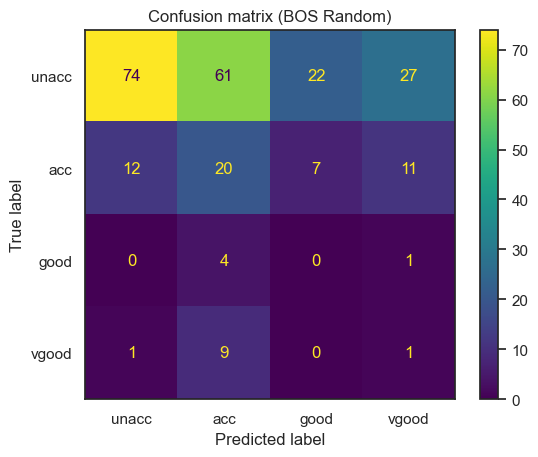

In [7]:
car.classification_results()

Clustered data into 4 clusters
Estimated alpha: [0.27483656 0.21269897 0.29413262 0.21833186]
Estimated mu: [[3 4 4 1 2 2]
 [2 1 1 1 2 1]
 [3 3 3 3 1 3]
 [1 3 2 2 3 1]]
Estimated pi: [[0.2085048  0.2085048  0.25788752 0.25788752 0.2085048  0.45816187]
 [0.18655693 0.25788752 0.48010974 0.48010974 0.04389575 0.30178326]
 [0.23593964 0.0877915  0.14266118 0.33196159 0.04389575 0.18655693]
 [0.3648834  0.0877915  0.15363512 0.48010974 0.51989026 0.23593964]]
              precision    recall  f1-score   support

           1       0.90      0.33      0.48       184
           2       0.37      0.56      0.44        50
           3       0.00      0.00      0.00         5
           4       0.12      0.64      0.21        11

    accuracy                           0.38       250
   macro avg       0.35      0.38      0.28       250
weighted avg       0.74      0.38      0.45       250

Clustered data into 4 clusters
Estimated means: [[3.55737705 1.54098361 2.26229508 1.81967213 1.96721311 

(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x2cf558590>,
 {'1': {'precision': 0.8688524590163934,
   'recall': 0.28804347826086957,
   'f1-score': 0.4326530612244898,
   'support': 184.0},
  '2': {'precision': 0.2839506172839506,
   'recall': 0.46,
   'f1-score': 0.3511450381679389,
   'support': 50.0},
  '3': {'precision': 0.01818181818181818,
   'recall': 0.2,
   'f1-score': 0.03333333333333333,
   'support': 5.0},
  '4': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 11.0},
  'accuracy': 0.308,
  'macro avg': {'precision': 0.29274622362054054,
   'recall': 0.23701086956521739,
   'f1-score': 0.2042828581814405,
   'support': 250.0},
  'weighted avg': {'precision': 0.696629169656492,
   'recall': 0.308,
   'f1-score': 0.389328327361479,
   'support': 250.0}})

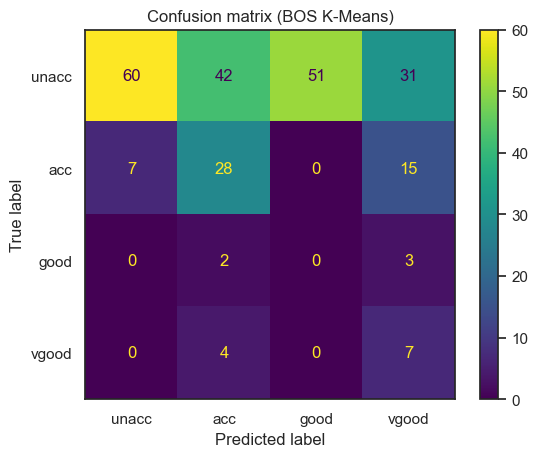

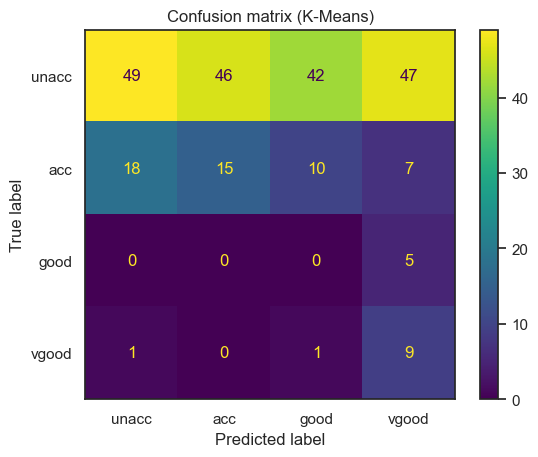

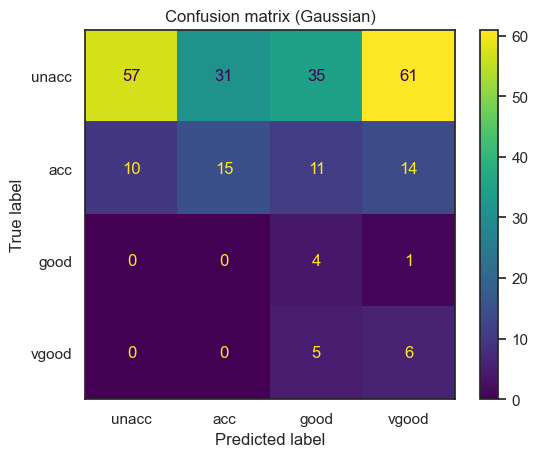

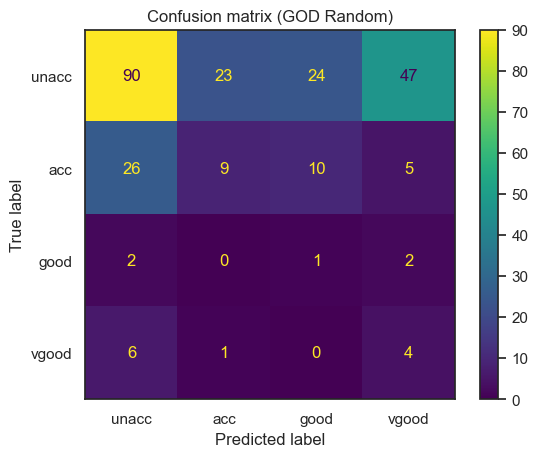

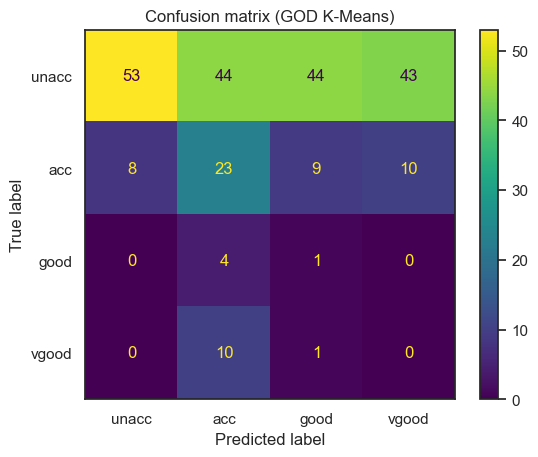

In [8]:
car.cluster_bos(init="kmeans")
car.classification_results()

car.cluster_kmeans()
car.classification_results()

car.cluster_gaussian()
car.classification_results()

car.cluster_god(init="random")
car.classification_results()

car.cluster_god(init="kmeans")
car.classification_results()

## 2. Hayes-Roth Dataset

This dataset is very small and the algorithm is able to handle it. We try to compare the results of the BOS model with other models as well and with the previous dataset.

In [9]:
hayesroth = HayesRoth(data_path.joinpath('hayes-roth.csv'))

hayesroth.cluster_bos()

Clustered data into 3 clusters
Estimated alpha: [0.36696927 0.39253299 0.24049775]
Estimated mu: [[1 1 2 1]
 [2 2 1 2]
 [3 1 2 1]]
Estimated pi: [[0.2085048  0.43072702 0.48010974 0.37585734]
 [0.0877915  0.56927298 0.69821674 0.33470508]
 [0.23593964 0.25788752 0.48010974 0.45816187]]


array([2, 1, 3, 1, 1, 1, 1, 3, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 3, 1, 1, 2,
       1, 2, 1, 3, 2, 1, 1, 2, 2, 2, 2, 2, 3, 1, 1, 3, 2, 3, 1, 2, 2, 2,
       3, 2, 2, 2, 1, 2, 3, 2, 2, 3, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 3, 2, 3,
       2, 2, 1, 1, 1, 2, 2, 3, 2, 1, 1, 3, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2,
       2, 2, 1, 3, 2, 2, 1, 2, 3, 3, 1, 2, 1, 3, 2, 2, 2, 1, 1, 2, 1, 2])

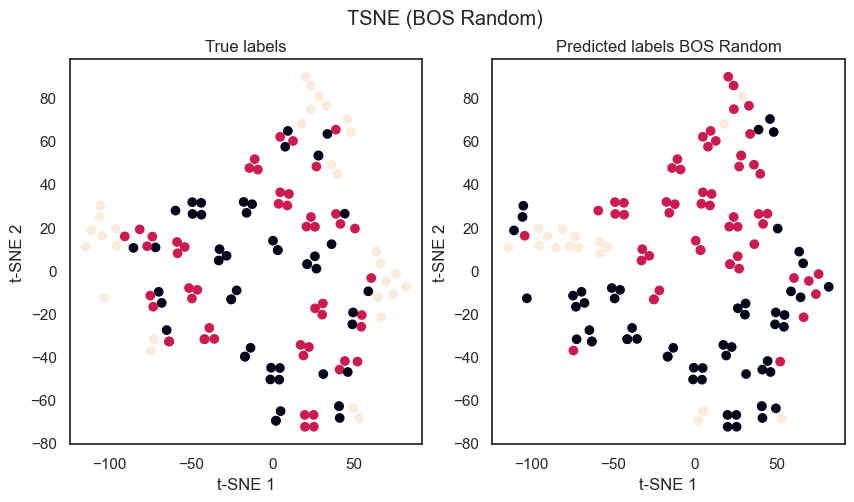

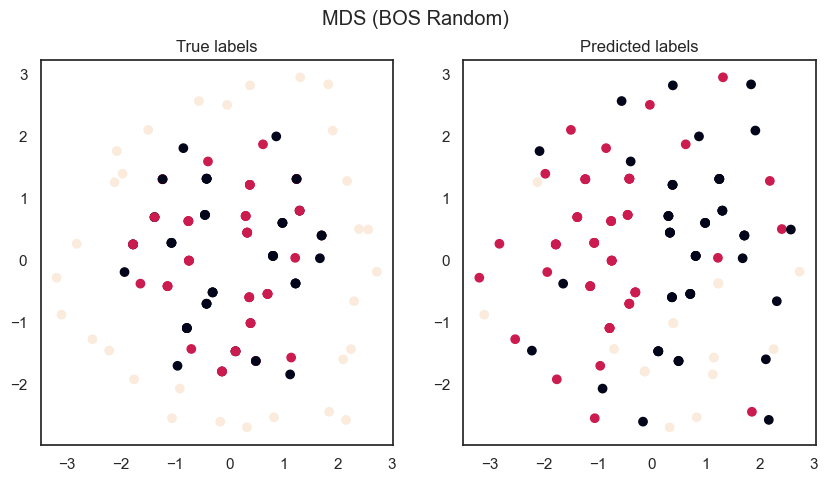

In [10]:
hayesroth.plot_tsne()
hayesroth.plot_mds()


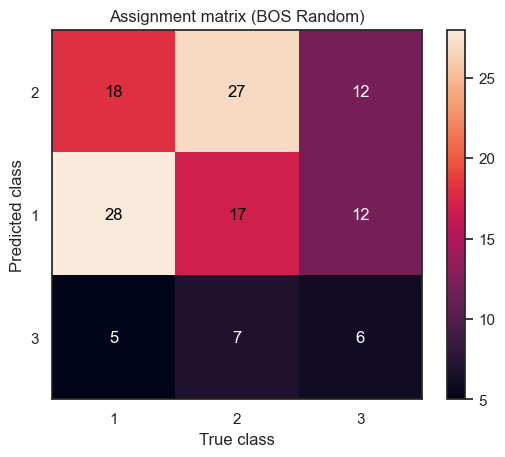

In [11]:
hayesroth.plot_assignment_matrix()

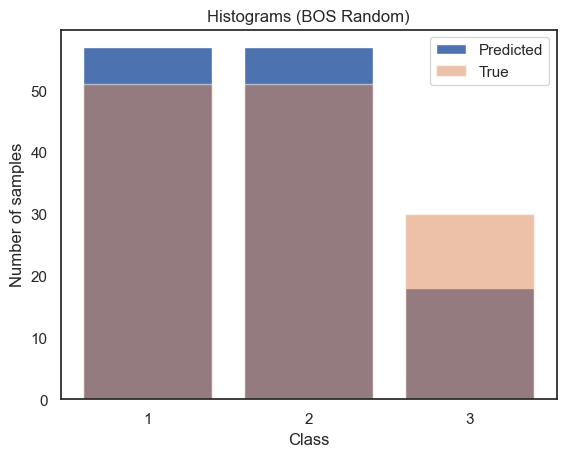

In [12]:
hayesroth.plot_histograms()

              precision    recall  f1-score   support

           1       0.49      0.55      0.52        51
           2       0.47      0.53      0.50        51
           3       0.33      0.20      0.25        30

    accuracy                           0.46       132
   macro avg       0.43      0.43      0.42       132
weighted avg       0.45      0.46      0.45       132



(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x2d3a12010>,
 {'1': {'precision': 0.49122807017543857,
   'recall': 0.5490196078431373,
   'f1-score': 0.5185185185185185,
   'support': 51.0},
  '2': {'precision': 0.47368421052631576,
   'recall': 0.5294117647058824,
   'f1-score': 0.5,
   'support': 51.0},
  '3': {'precision': 0.3333333333333333,
   'recall': 0.2,
   'f1-score': 0.25,
   'support': 30.0},
  'accuracy': 0.4621212121212121,
  'macro avg': {'precision': 0.4327485380116958,
   'recall': 0.42614379084967324,
   'f1-score': 0.42283950617283955,
   'support': 132.0},
  'weighted avg': {'precision': 0.44856459330143533,
   'recall': 0.4621212121212121,
   'f1-score': 0.4503367003367003,
   'support': 132.0}})

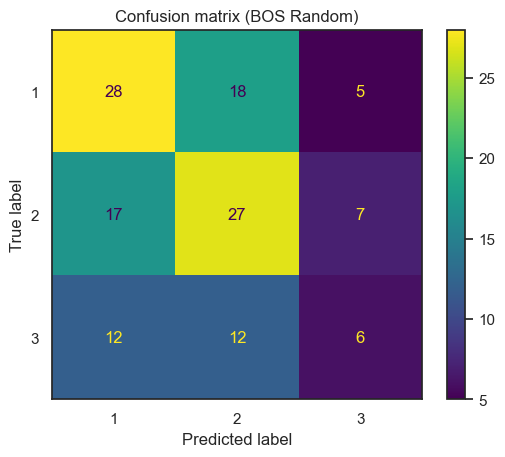

In [13]:
hayesroth.classification_results()

Clustered data into 3 clusters
Estimated alpha: [0.32618056 0.34884371 0.32497573]
Estimated mu: [[1 1 3 2]
 [2 2 1 3]
 [2 3 2 1]]
Estimated pi: [[0.04389575 0.7914952  0.15363512 0.76406036]
 [0.04389575 0.74211248 0.74211248 0.10973937]
 [0.04389575 0.15363512 0.76406036 0.76406036]]
              precision    recall  f1-score   support

           1       0.39      0.33      0.36        51
           2       0.39      0.33      0.36        51
           3       0.23      0.33      0.27        30

    accuracy                           0.33       132
   macro avg       0.33      0.33      0.33       132
weighted avg       0.35      0.33      0.34       132

Clustered data into 3 clusters
Estimated means: [[1.93181818 1.15909091 2.72727273 1.97727273]
 [2.09090909 2.72727273 1.97727273 1.15909091]
 [1.97727273 1.97727273 1.15909091 2.72727273]]
              precision    recall  f1-score   support

           1       0.39      0.33      0.36        51
           2       0.39      0.33

(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x2d3dad790>,
 {'1': {'precision': 0.425,
   'recall': 0.3333333333333333,
   'f1-score': 0.37362637362637363,
   'support': 51.0},
  '2': {'precision': 0.38636363636363635,
   'recall': 0.3333333333333333,
   'f1-score': 0.35789473684210527,
   'support': 51.0},
  '3': {'precision': 0.2708333333333333,
   'recall': 0.43333333333333335,
   'f1-score': 0.33333333333333337,
   'support': 30.0},
  'accuracy': 0.3560606060606061,
  'macro avg': {'precision': 0.3607323232323232,
   'recall': 0.3666666666666667,
   'f1-score': 0.3549514812672707,
   'support': 132.0},
  'weighted avg': {'precision': 0.37503443526170793,
   'recall': 0.3560606060606061,
   'f1-score': 0.3583907320749426,
   'support': 132.0}})

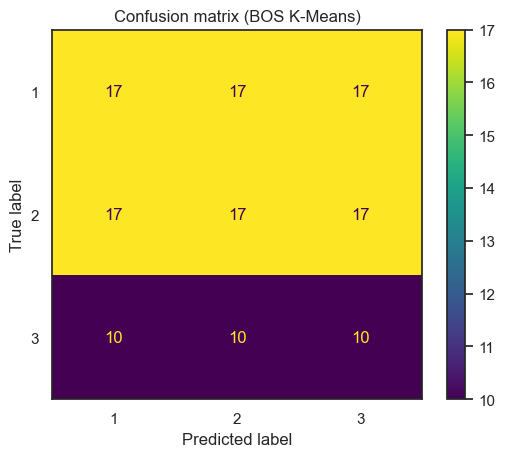

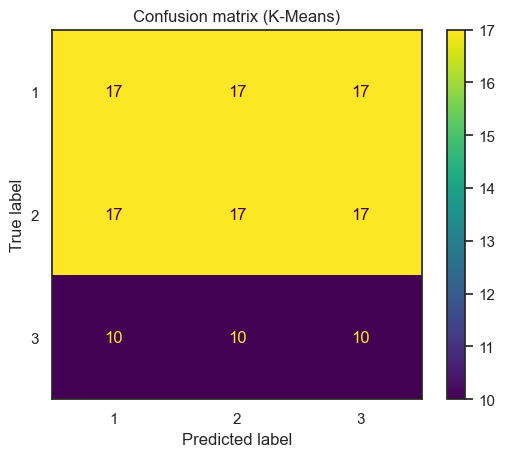

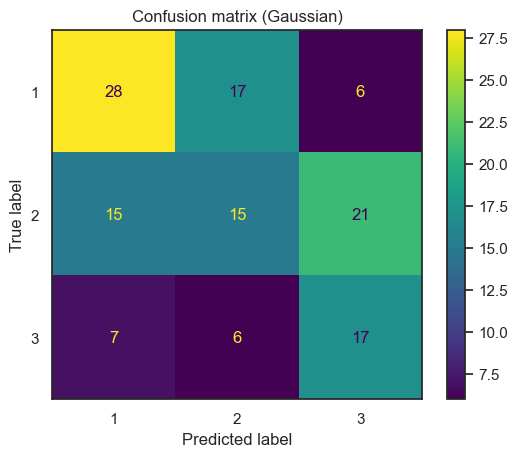

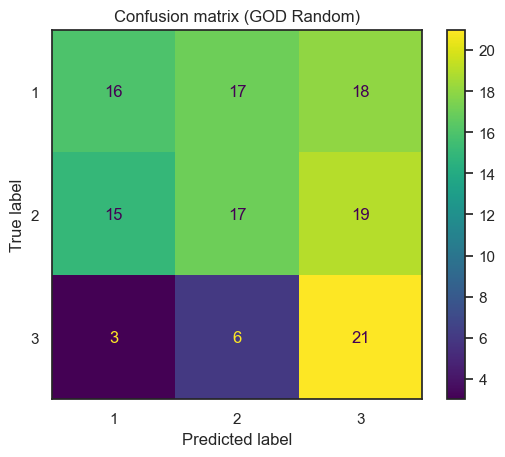

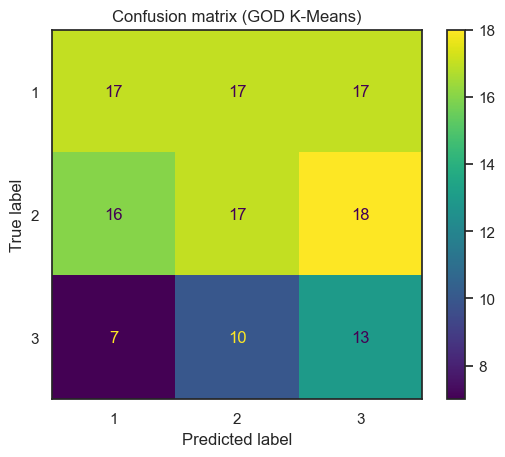

In [14]:
hayesroth.cluster_bos(init="kmeans")
hayesroth.classification_results()

hayesroth.cluster_kmeans()
hayesroth.classification_results()

hayesroth.cluster_gaussian()
hayesroth.classification_results()

hayesroth.cluster_god(init="random")
hayesroth.classification_results()

hayesroth.cluster_god(init="kmeans")
hayesroth.classification_results()

## 3. Caesarian Dataset

In [15]:
from src.dataset import Caesarian

caesarian = Caesarian(data_path.joinpath('caesarian.csv'))

In [16]:
caesarian.cluster_bos()

Clustered data into 2 clusters
Estimated alpha: [0.44280103 0.55719897]
Estimated mu: [[1 1 1 1 1]
 [3 2 1 2 1]]
Estimated pi: [[0.43072702 0.95610425 0.25788752 0.04389575 0.45816187]
 [0.3648834  0.54183813 0.43072702 0.48010974 0.0877915 ]]


array([1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2,
       2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2])

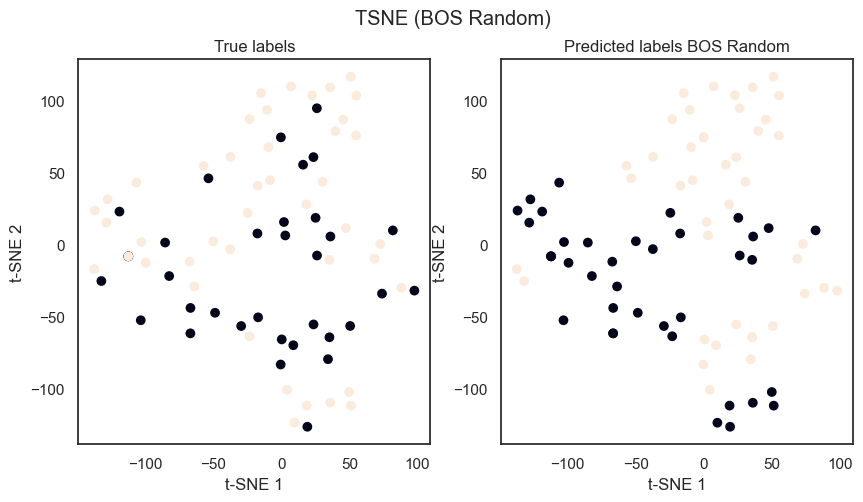

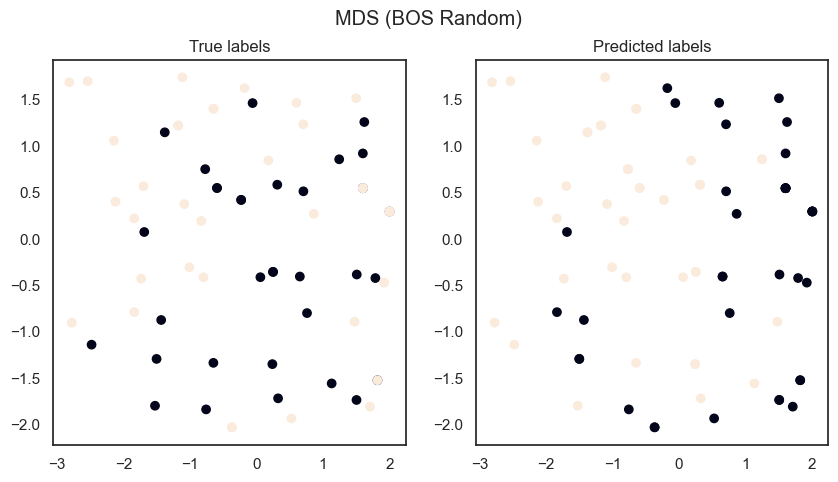

In [17]:
caesarian.plot_tsne()
caesarian.plot_mds()

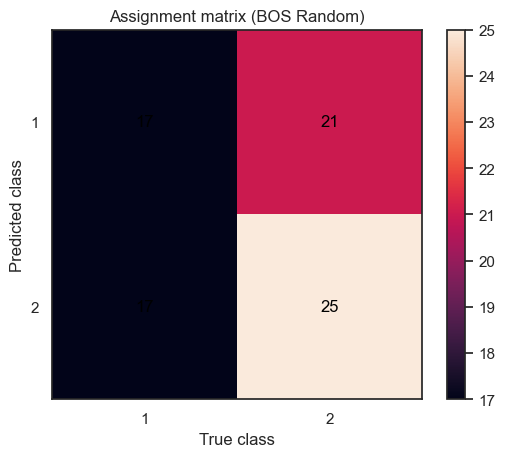

In [18]:
caesarian.plot_assignment_matrix()

              precision    recall  f1-score   support

           1       0.45      0.50      0.47        34
           2       0.60      0.54      0.57        46

    accuracy                           0.53        80
   macro avg       0.52      0.52      0.52        80
weighted avg       0.53      0.53      0.53        80



(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x2e70bfd10>,
 {'1': {'precision': 0.4473684210526316,
   'recall': 0.5,
   'f1-score': 0.4722222222222222,
   'support': 34.0},
  '2': {'precision': 0.5952380952380952,
   'recall': 0.5434782608695652,
   'f1-score': 0.5681818181818181,
   'support': 46.0},
  'accuracy': 0.525,
  'macro avg': {'precision': 0.5213032581453634,
   'recall': 0.5217391304347826,
   'f1-score': 0.5202020202020201,
   'support': 80.0},
  'weighted avg': {'precision': 0.5323934837092732,
   'recall': 0.525,
   'f1-score': 0.5273989898989898,
   'support': 80.0}})

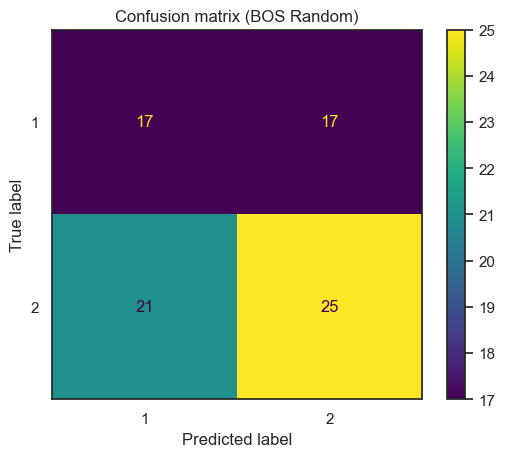

In [19]:
caesarian.classification_results()

Clustered data into 2 clusters
Estimated alpha: [0.47135324 0.52864676]
Estimated mu: [[1 1 1 1 1]
 [3 2 1 2 1]]
Estimated pi: [[0.40877915 0.9122085  0.25788752 0.04389575 0.45816187]
 [0.40877915 0.54183813 0.45816187 0.48010974 0.0877915 ]]
              precision    recall  f1-score   support

           1       0.45      0.50      0.47        34
           2       0.60      0.54      0.57        46

    accuracy                           0.53        80
   macro avg       0.52      0.52      0.52        80
weighted avg       0.53      0.53      0.53        80

Clustered data into 2 clusters
Estimated means: [[1.41463415 1.31707317 1.73170732 1.90243902 1.24390244]
 [3.33333333 2.02564103 1.53846154 2.1025641  1.51282051]]
              precision    recall  f1-score   support

           1       0.49      0.59      0.53        34
           2       0.64      0.54      0.59        46

    accuracy                           0.56        80
   macro avg       0.56      0.57      0.56   

(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x2d3b63bd0>,
 {'1': {'precision': 0.4473684210526316,
   'recall': 0.5,
   'f1-score': 0.4722222222222222,
   'support': 34.0},
  '2': {'precision': 0.5952380952380952,
   'recall': 0.5434782608695652,
   'f1-score': 0.5681818181818181,
   'support': 46.0},
  'accuracy': 0.525,
  'macro avg': {'precision': 0.5213032581453634,
   'recall': 0.5217391304347826,
   'f1-score': 0.5202020202020201,
   'support': 80.0},
  'weighted avg': {'precision': 0.5323934837092732,
   'recall': 0.525,
   'f1-score': 0.5273989898989898,
   'support': 80.0}})

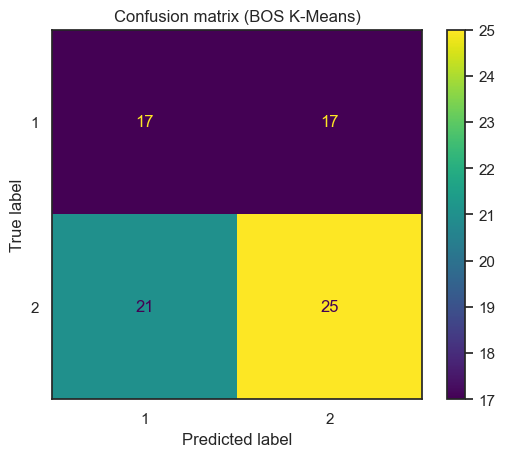

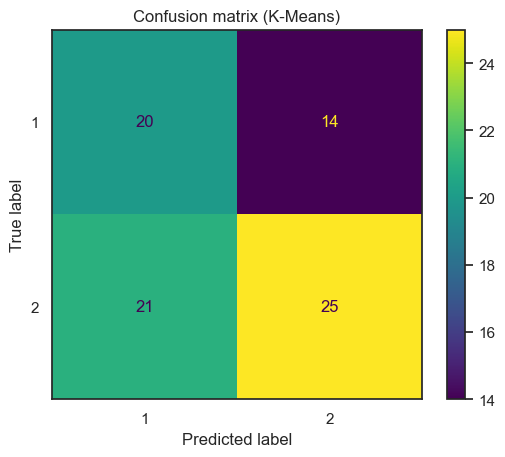

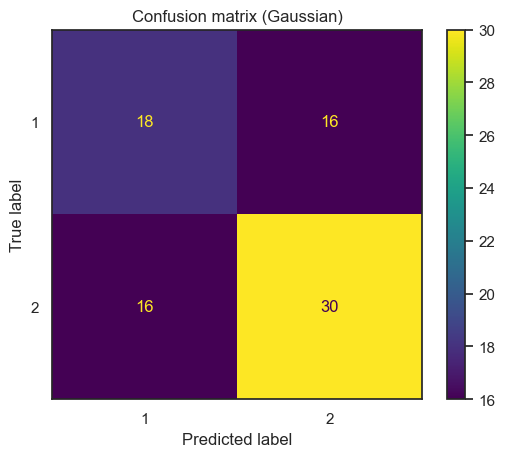

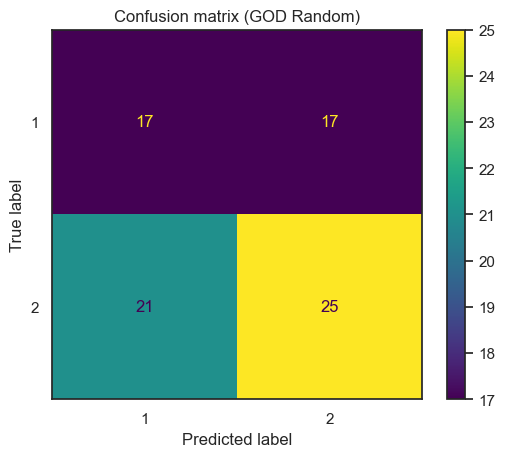

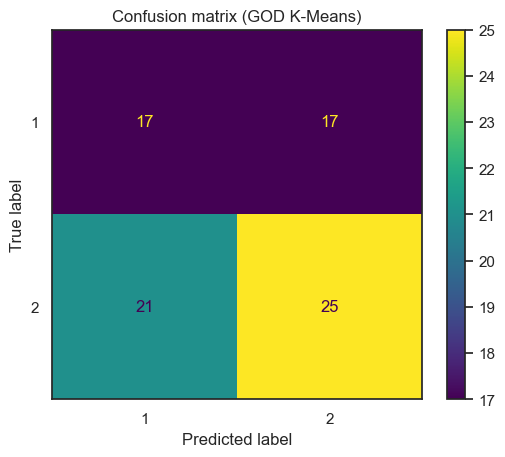

In [20]:
caesarian.cluster_bos(init="kmeans")
caesarian.classification_results()

caesarian.cluster_kmeans()
caesarian.classification_results()

caesarian.cluster_gaussian()
caesarian.classification_results()

caesarian.cluster_god(init="random")
caesarian.classification_results()

caesarian.cluster_god(init="kmeans")
caesarian.classification_results()

## Comparing the different scores

In [22]:
animals.save_dataset("../data/processed/zoo.csv")

In [23]:
hayesroth.save_dataset("../data/processed/hayes-roth.csv")

In [25]:
car.save_dataset("../data/processed/car.csv")

In [26]:
caesarian.save_dataset("../data/processed/caesarian.csv")

In [27]:
#multi index: dataset, method

runtypes = ["BOS Random", "BOS K-Means", "GOD Random", "GOD K-Means", "K-Means", "Gaussian"]

index = pd.MultiIndex.from_product([['Zoo', 'Car Evaluation', 'Hayes-Roth', 'Caesarian'], runtypes], names=['Dataset', 'Method'])

df_scores = pd.DataFrame(columns=['runtime', 'f1-score', 'recall', 'precision', 'accuracy', 'wasserstein-distance', 'adjusted-rand-index'], index=index)

df_scores

runtime f1-score recall precision accuracy  \
Dataset        Method                                                   
Zoo            BOS Random      NaN      NaN    NaN       NaN      NaN   
               BOS K-Means     NaN      NaN    NaN       NaN      NaN   
               GOD Random      NaN      NaN    NaN       NaN      NaN   
               GOD K-Means     NaN      NaN    NaN       NaN      NaN   
               K-Means         NaN      NaN    NaN       NaN      NaN   
               Gaussian        NaN      NaN    NaN       NaN      NaN   
Car Evaluation BOS Random      NaN      NaN    NaN       NaN      NaN   
               BOS K-Means     NaN      NaN    NaN       NaN      NaN   
               GOD Random      NaN      NaN    NaN       NaN      NaN   
               GOD K-Means     NaN      NaN    NaN       NaN      NaN   
               K-Means         NaN      NaN    NaN       NaN      NaN   
               Gaussian        NaN      NaN    NaN       NaN      NaN   
Hayes-Roth     BOS Random      NaN      NaN    NaN       NaN      NaN   
               BOS K-Means     NaN      NaN    NaN       NaN      NaN   
               GOD Random      NaN      NaN    NaN       NaN      NaN   
               GOD K-Means     NaN      NaN    NaN       NaN      NaN   
               K-Means         NaN      NaN    NaN       NaN      NaN   
               Gaussian        NaN      NaN    NaN       NaN      NaN   
Caesarian      BOS Random      NaN      NaN    NaN       NaN      NaN   
               BOS K-Means     NaN      NaN    NaN       NaN      NaN   
               GOD Random      NaN      NaN    NaN       NaN      NaN   
               GOD K-Means     NaN      NaN    NaN       NaN      NaN   
               K-Means         NaN      NaN    NaN       NaN      NaN   
               Gaussian        NaN      NaN    NaN       NaN      NaN   

                           wasserstein-distance adjusted-rand-index  
Dataset        Method                                                
Zoo            BOS Random                   NaN                 NaN  
               BOS K-Means                  NaN                 NaN  
               GOD Random                   NaN                 NaN  
               GOD K-Means                  NaN                 NaN  
               K-Means                      NaN                 NaN  
               Gaussian                     NaN                 NaN  
Car Evaluation BOS Random                   NaN                 NaN  
               BOS K-Means                  NaN                 NaN  
               GOD Random                   NaN                 NaN  
               GOD K-Means                  NaN                 NaN  
               K-Means                      NaN                 NaN  
               Gaussian                     NaN                 NaN  
Hayes-Roth     BOS Random                   NaN                 NaN  
               BOS K-Means                  NaN                 NaN  
               GOD Random                   NaN                 NaN  
               GOD K-Means                  NaN                 NaN  
               K-Means                      NaN                 NaN  
               Gaussian                     NaN                 NaN  
Caesarian      BOS Random                   NaN                 NaN  
               BOS K-Means                  NaN                 NaN  
               GOD Random                   NaN                 NaN  
               GOD K-Means                  NaN                 NaN  
               K-Means                      NaN                 NaN  
               Gaussian                     NaN                 NaN

In [28]:
for runtype in runtypes:
    if runtype in animals.scores:
        df_scores.loc['Zoo', runtype] = animals.scores[runtype]

for runtype in runtypes:
    if runtype in car.scores:
        df_scores.loc['Car Evaluation', runtype] = car.scores[runtype]

for runtype in runtypes:
    if runtype in hayesroth.scores:
        df_scores.loc['Hayes-Roth', runtype] = hayesroth.scores[runtype]

for runtype in runtypes:
    if runtype in caesarian.scores:
        df_scores.loc['Caesarian', runtype] = caesarian.scores[runtype]

df_scores.to_csv(data_path.joinpath('datasets_scores.csv'))

df_scores

runtime  f1-score    recall precision  accuracy  \
Dataset        Method                                                          
Zoo            BOS Random   0.858265  0.887463  0.891089  0.897768  0.891089   
               BOS K-Means  0.351888  0.805999   0.80198  0.846211   0.80198   
               GOD Random   0.653207  0.898149   0.90099   0.89733   0.90099   
               GOD K-Means  0.251507  0.805999   0.80198  0.846211   0.80198   
               K-Means      0.009191  0.842457  0.851485  0.873556  0.851485   
               Gaussian      2.57501  0.771476  0.742574  0.825854  0.742574   
Car Evaluation BOS Random   0.200323  0.459229      0.38  0.669676      0.38   
               BOS K-Means  0.568001  0.449955      0.38  0.738289      0.38   
               GOD Random   0.191549  0.479605     0.416  0.592345     0.416   
               GOD K-Means  0.539353  0.389328     0.308  0.696629     0.308   
               K-Means      0.008191  0.350302     0.292  0.585357     0.292   
               Gaussian     0.051363  0.405123     0.328  0.696041     0.328   
Hayes-Roth     BOS Random   0.077433  0.450337  0.462121  0.448565  0.462121   
               BOS K-Means  0.078685   0.33798  0.333333  0.350207  0.333333   
               GOD Random    0.27592  0.398281  0.409091  0.428311  0.409091   
               GOD K-Means  0.060561  0.358391  0.356061  0.375034  0.356061   
               K-Means      0.007851   0.33798  0.333333  0.350207  0.333333   
               Gaussian     0.027993  0.448879  0.454545  0.456686  0.454545   
Caesarian      BOS Random   0.085499  0.527399     0.525  0.532393     0.525   
               BOS K-Means  0.024164  0.527399     0.525  0.532393     0.525   
               GOD Random   0.099735  0.527399     0.525  0.532393     0.525   
               GOD K-Means  0.070834  0.527399     0.525  0.532393     0.525   
               K-Means      0.006183  0.564902    0.5625  0.575907    0.5625   
               Gaussian     0.013781       0.6       0.6       0.6       0.6   

                           wasserstein-distance adjusted-rand-index  
Dataset        Method                                                
Zoo            BOS Random               0.19802            0.853274  
               BOS K-Means             0.277228            0.825552  
               GOD Random              0.079208             0.90625  
               GOD K-Means             0.277228            0.825552  
               K-Means                  0.19802             0.83424  
               Gaussian                0.554455            0.660725  
Car Evaluation BOS Random                 0.716            0.008702  
               BOS K-Means                1.012             0.03795  
               GOD Random                 0.736           -0.000454  
               GOD K-Means                1.028           -0.004028  
               K-Means                    1.112            0.000184  
               Gaussian                   1.236            0.014741  
Hayes-Roth     BOS Random              0.136364            0.020472  
               BOS K-Means             0.159091           -0.014914  
               GOD Random              0.340909            0.007839  
               GOD K-Means             0.219697           -0.012581  
               K-Means                 0.159091           -0.014914  
               Gaussian                0.113636            0.066466  
Caesarian      BOS Random                  0.05           -0.010023  
               BOS K-Means                 0.05           -0.010023  
               GOD Random                  0.05           -0.010023  
               GOD K-Means                 0.05           -0.010023  
               K-Means                   0.0875            0.003286  
               Gaussian                     0.0            0.027748

In [29]:
df_scores_latex = df_scores.copy()

df_scores_latex = df_scores_latex.drop(columns=['recall', 'precision'])

df_scores_latex.columns = pd.Index(["\\textbf{Runtime (s)}", "\\textbf{F1}", "\\textbf{Accuracy}", "\\textbf{Wasserstein}", "\\textbf{ARI}"])

caption = """
Results of the classification task for the different datasets and the proposed methods. 
The metrics are the F1-score, the accuracy, the Wasserstein distance and the adjusted rand index (ARI). 
The runtime is also reported. 
The best results for each dataset and metric are highlighted in bold italic and underlined. 
"""
# The best results for each method and metric are highlighted in bold italic and underlined. The best results for each dataset, method and metric are highlighted in bold italic and underlined.

#put caption and label at the bottom, htpb
print(df_scores_latex.to_latex(caption=caption, float_format="%.2f", 
                         label="tab:results_real", bold_rows=True, multirow=True, multicolumn=True, 
                            ))

\begin{table}
\caption{
Results of the classification task for the different datasets and the proposed methods. 
The metrics are the F1-score, the accuracy, the Wasserstein distance and the adjusted rand index (ARI). 
The runtime is also reported. 
The best results for each dataset and metric are highlighted in bold italic and underlined. 
}
\label{tab:results_real}
\begin{tabular}{lllllll}
\toprule
 &  & \textbf{Runtime (s)} & \textbf{F1} & \textbf{Accuracy} & \textbf{Wasserstein} & \textbf{ARI} \\
Dataset & Method &  &  &  &  &  \\
\midrule
\multirow[t]{6}{*}{\textbf{Zoo}} & \textbf{BOS Random} & 0.86 & 0.89 & 0.89 & 0.20 & 0.85 \\
\textbf{} & \textbf{BOS K-Means} & 0.35 & 0.81 & 0.80 & 0.28 & 0.83 \\
\textbf{} & \textbf{GOD Random} & 0.65 & 0.90 & 0.90 & 0.08 & 0.91 \\
\textbf{} & \textbf{GOD K-Means} & 0.25 & 0.81 & 0.80 & 0.28 & 0.83 \\
\textbf{} & \textbf{K-Means} & 0.01 & 0.84 & 0.85 & 0.20 & 0.83 \\
\textbf{} & \textbf{Gaussian} & 2.58 & 0.77 & 0.74 & 0.55 & 0.66 \\
\cline{1-7}

### Side by side plots for different models

#### T-SNE and MDS plots for the different models

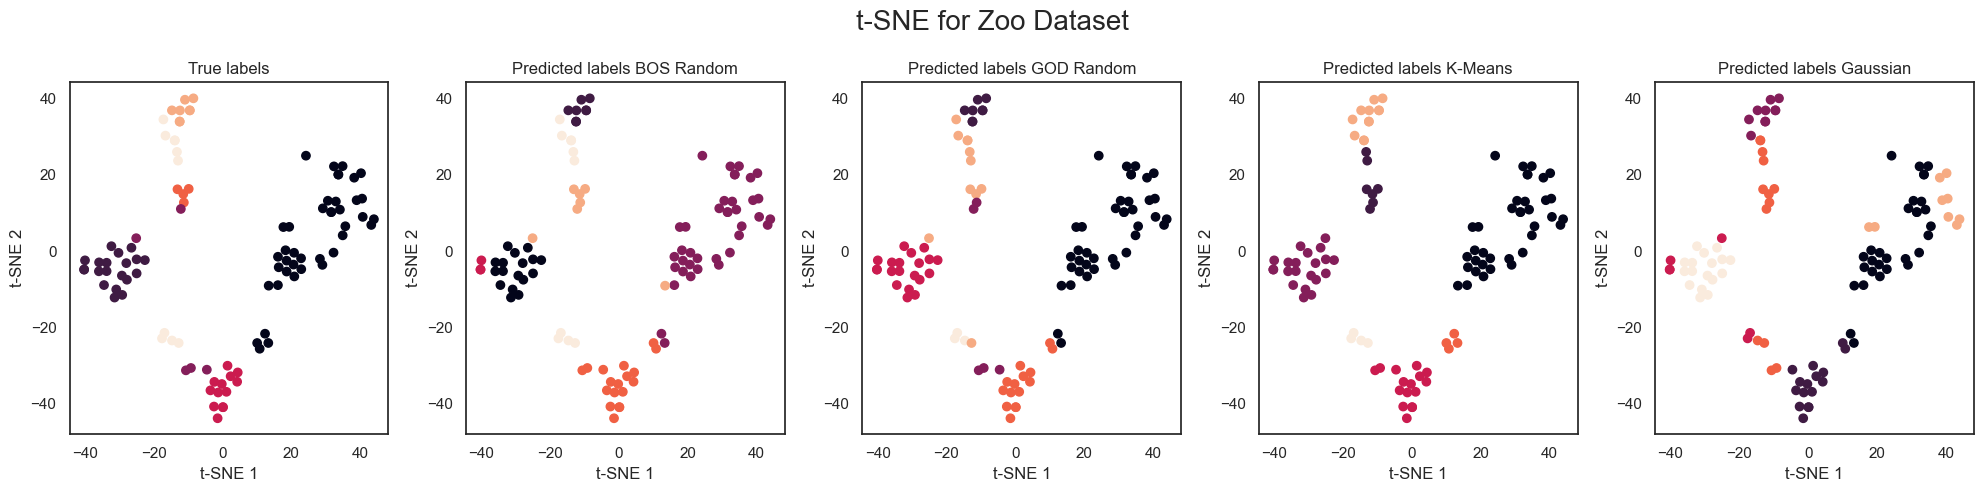

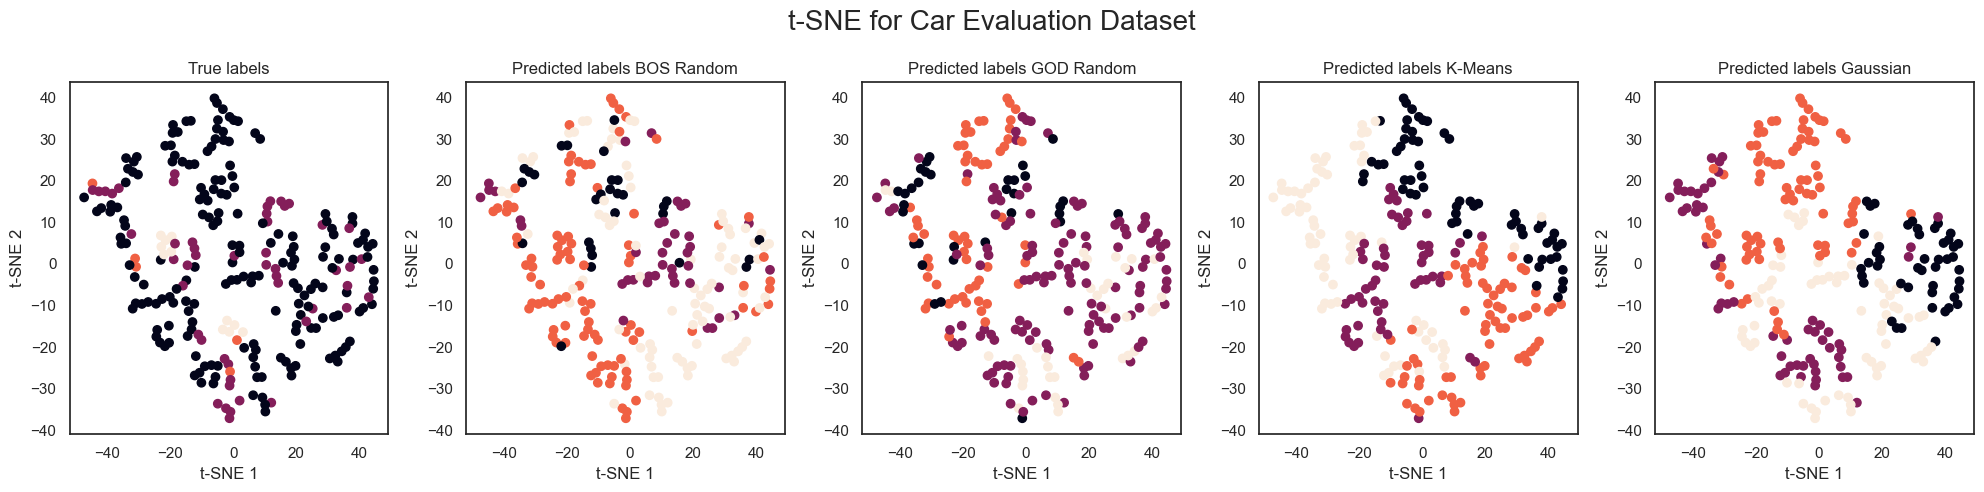

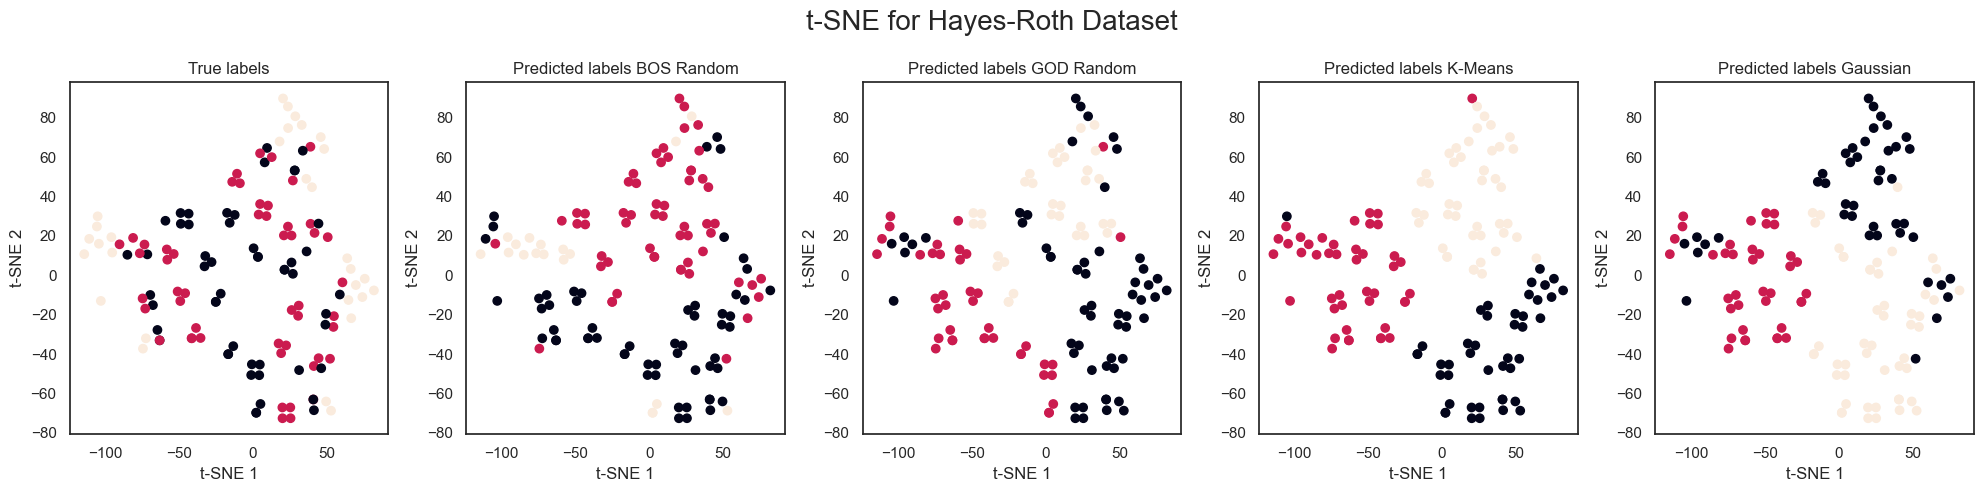

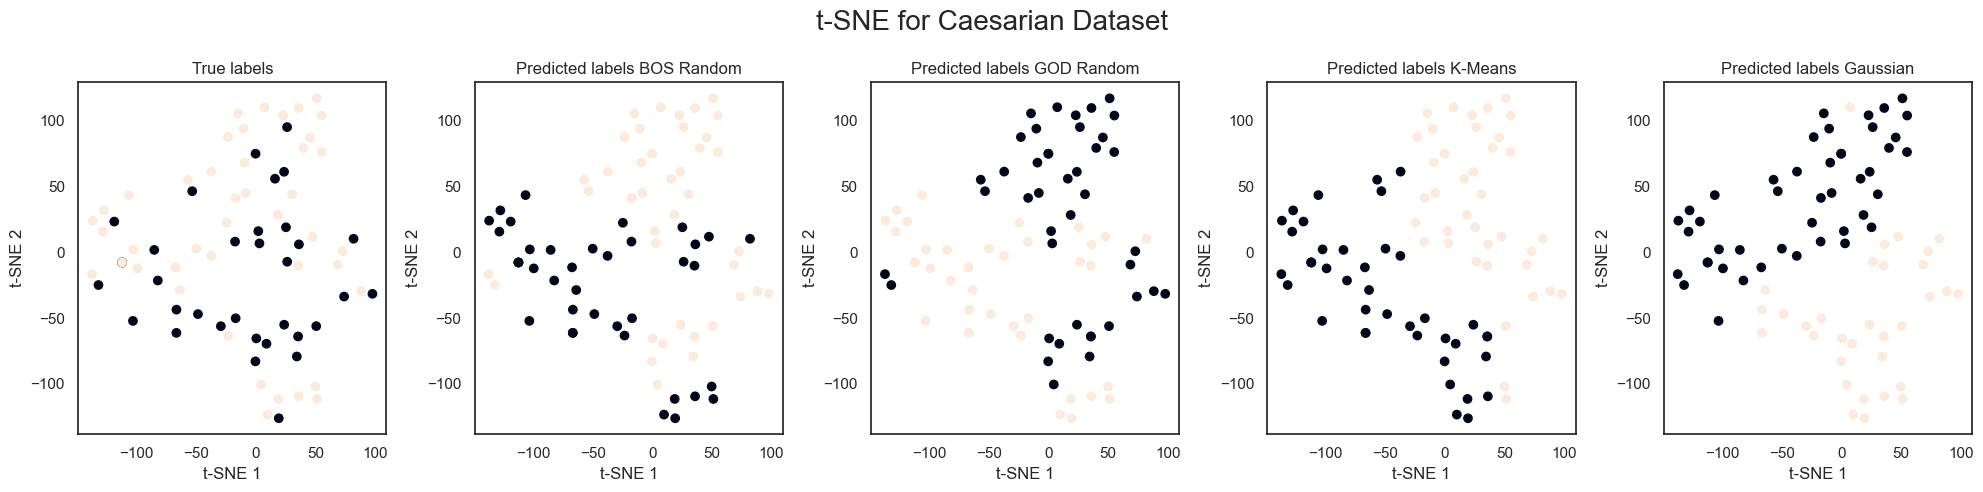

In [30]:
datasets = [animals, car, hayesroth, caesarian]
dataset_names = ["Zoo", "Car Evaluation", "Hayes-Roth", "Caesarian"]
runtypes = ["BOS Random", "GOD Random", "K-Means", "Gaussian"]

for i, dataset in enumerate(datasets):
    fig, ax = plt.subplots(1, 5, figsize=(20, 5))
    fig.tight_layout(pad=3.0)

    dataset.plot_tsne(ax=ax[:], show=False, runtype=runtypes[0])

    for j, runtype in enumerate(runtypes[1:]):
        dataset.plot_tsne(ax=ax[j+2], show=False, runtype=runtype)
    
    fig.suptitle(f"t-SNE for {dataset_names[i]} Dataset", fontsize=20)
    # fig.savefig(f"../figs/tsne_{dataset_names[i].lower().replace(' ', '_')}.png", dpi=300)
    plt.tight_layout()
    plt.show()



#### Assignment matrices for the different models

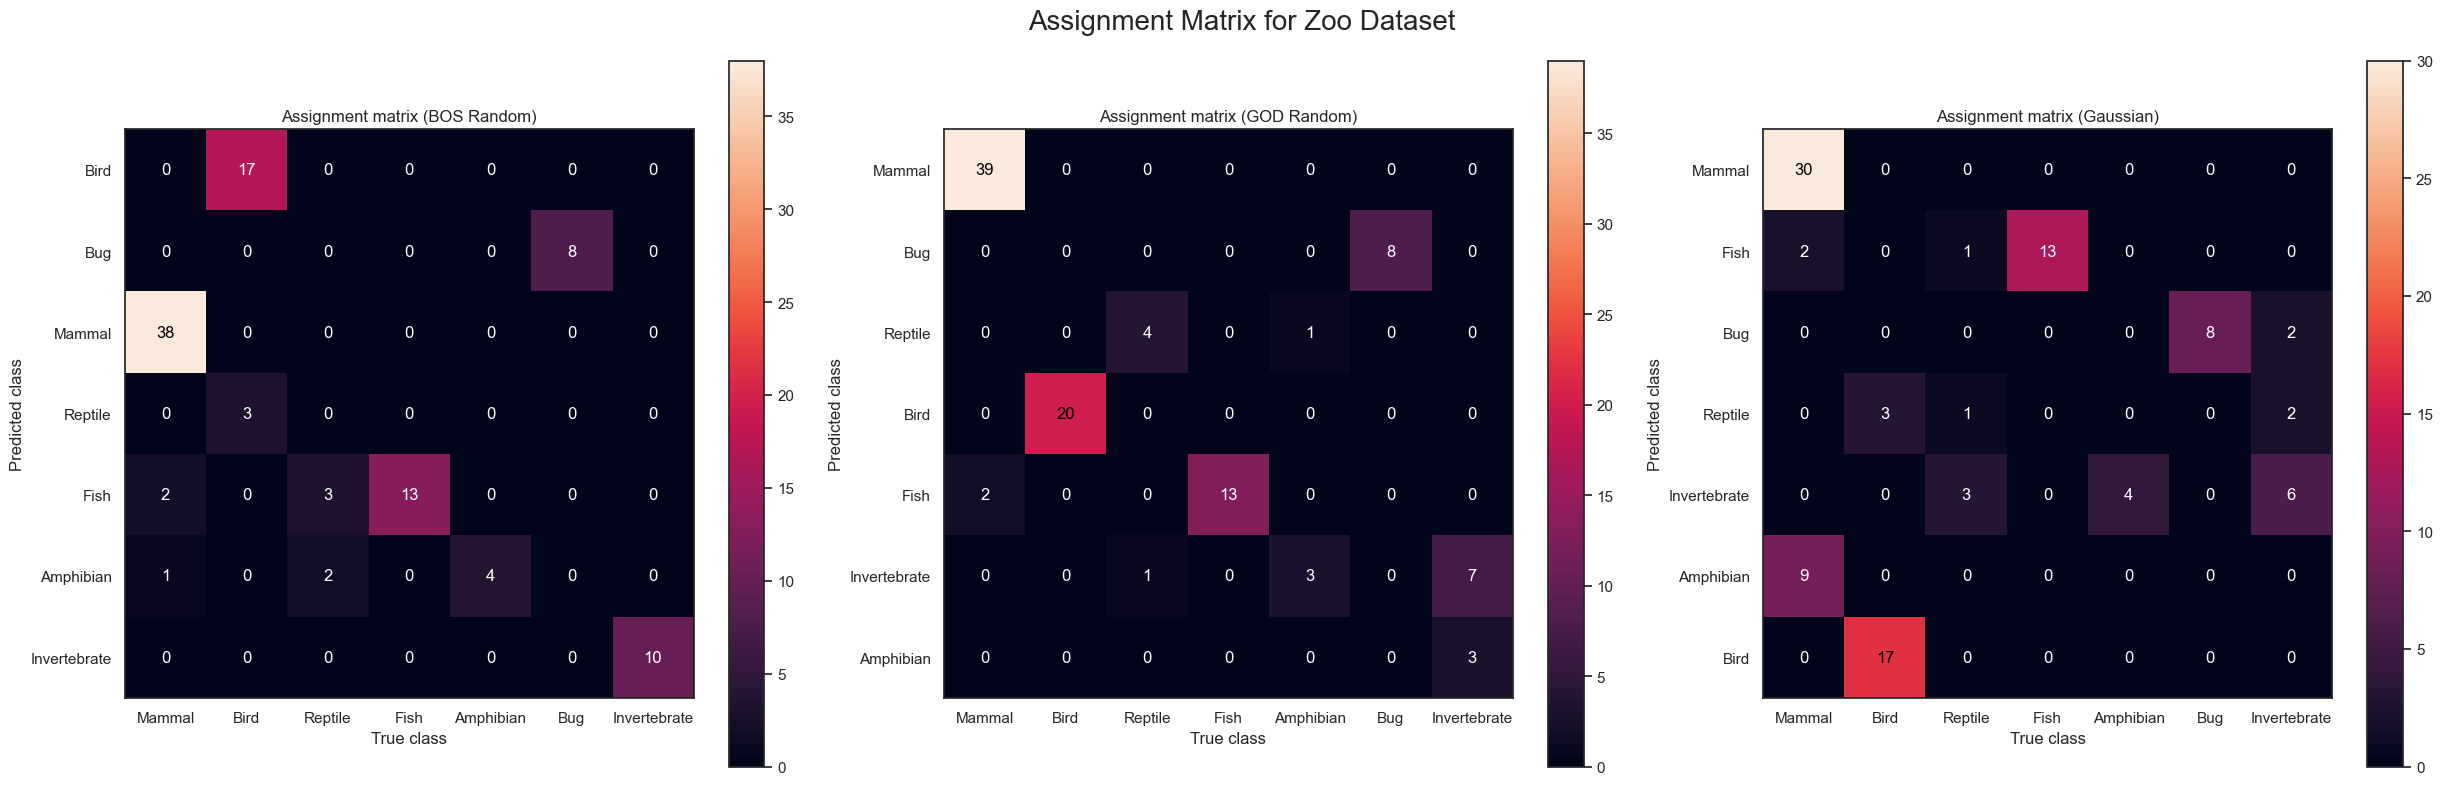

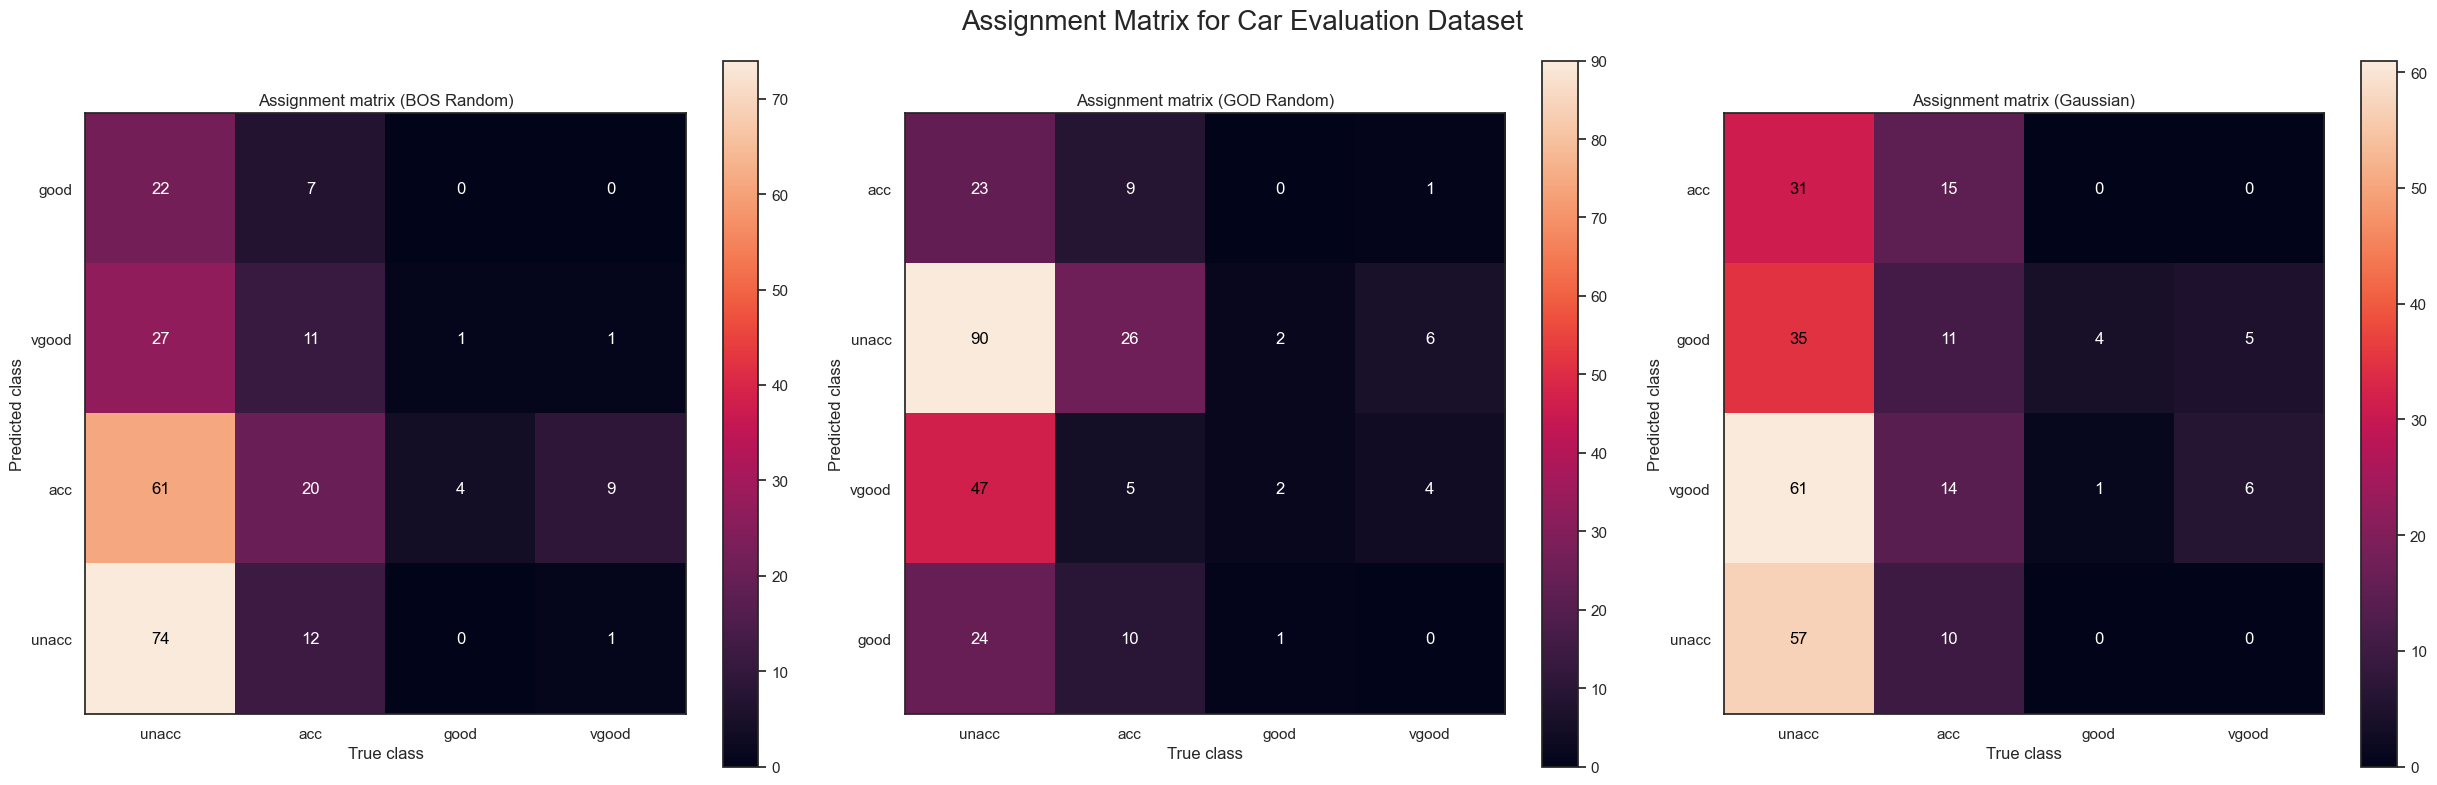

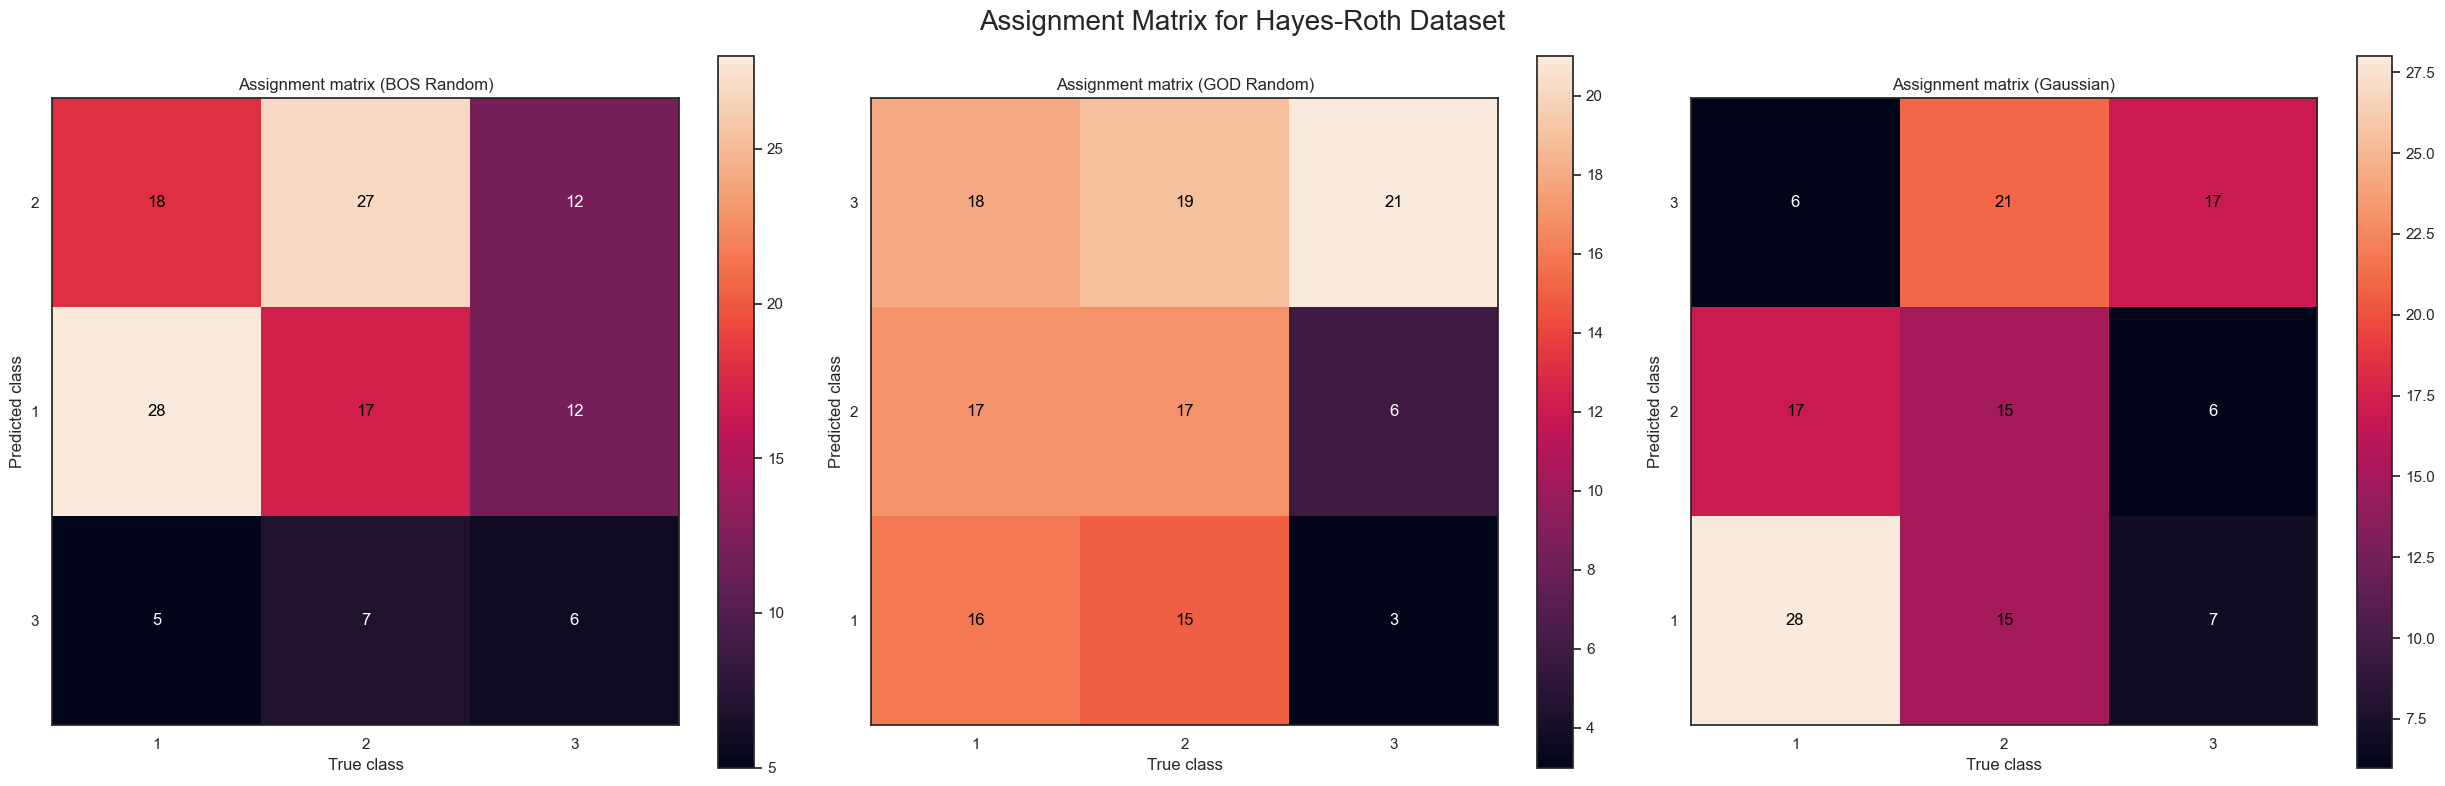

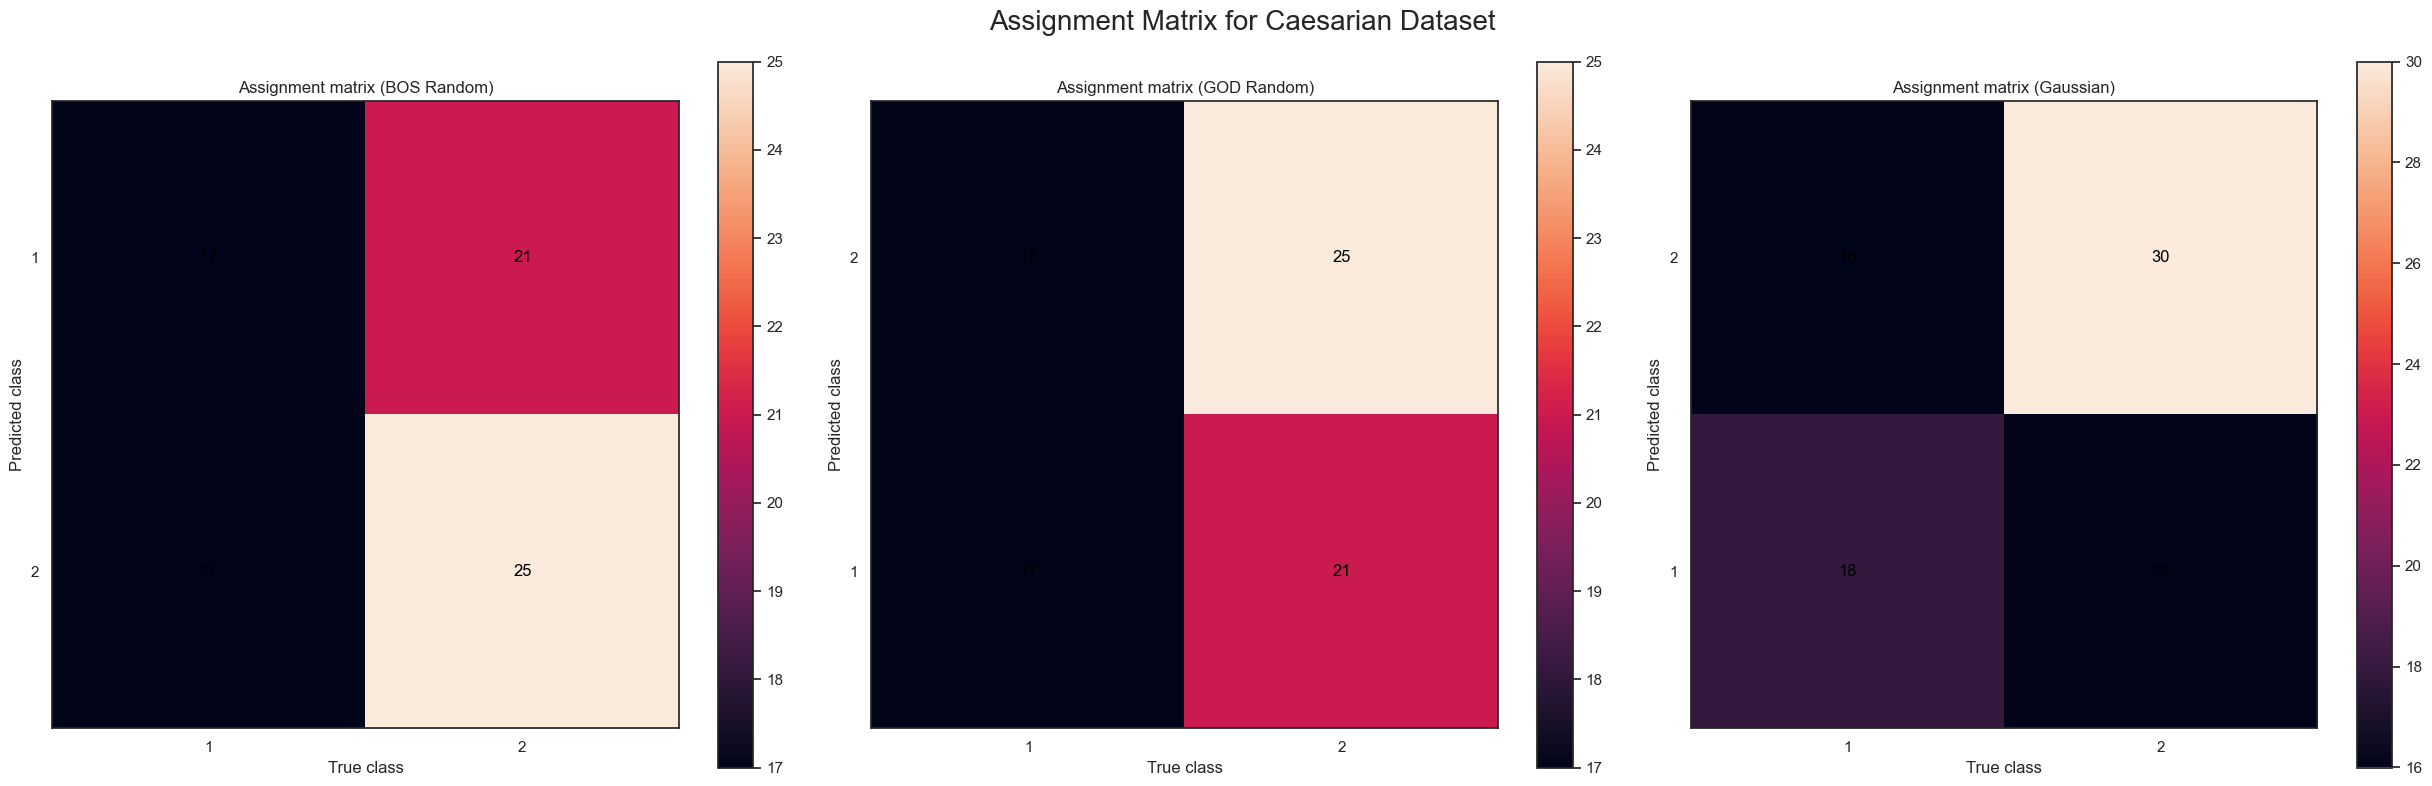

In [31]:
datasets = [animals, car, hayesroth, caesarian]
dataset_names = ["Zoo", "Car Evaluation", "Hayes-Roth", "Caesarian"]
runtypes = ["BOS Random", "GOD Random",  "Gaussian"]

for i, dataset in enumerate(datasets):
    fig = plt.figure(figsize=(25, 8))
    for j, runtype in enumerate(runtypes[:]):
        plt.subplot(1, len(runtypes), j+1)
        dataset.plot_assignment_matrix(runtype=runtypes[j], show=False)
    
    fig.suptitle(f"Assignment Matrix for {dataset_names[i]} Dataset", fontsize=20)
    # fig.savefig(f"../figs/assignment_matrix_{dataset_names[i].lower().replace(' ', '_')}.png", dpi=300)

    plt.tight_layout()
    plt.show()

#### Histograms for the different models

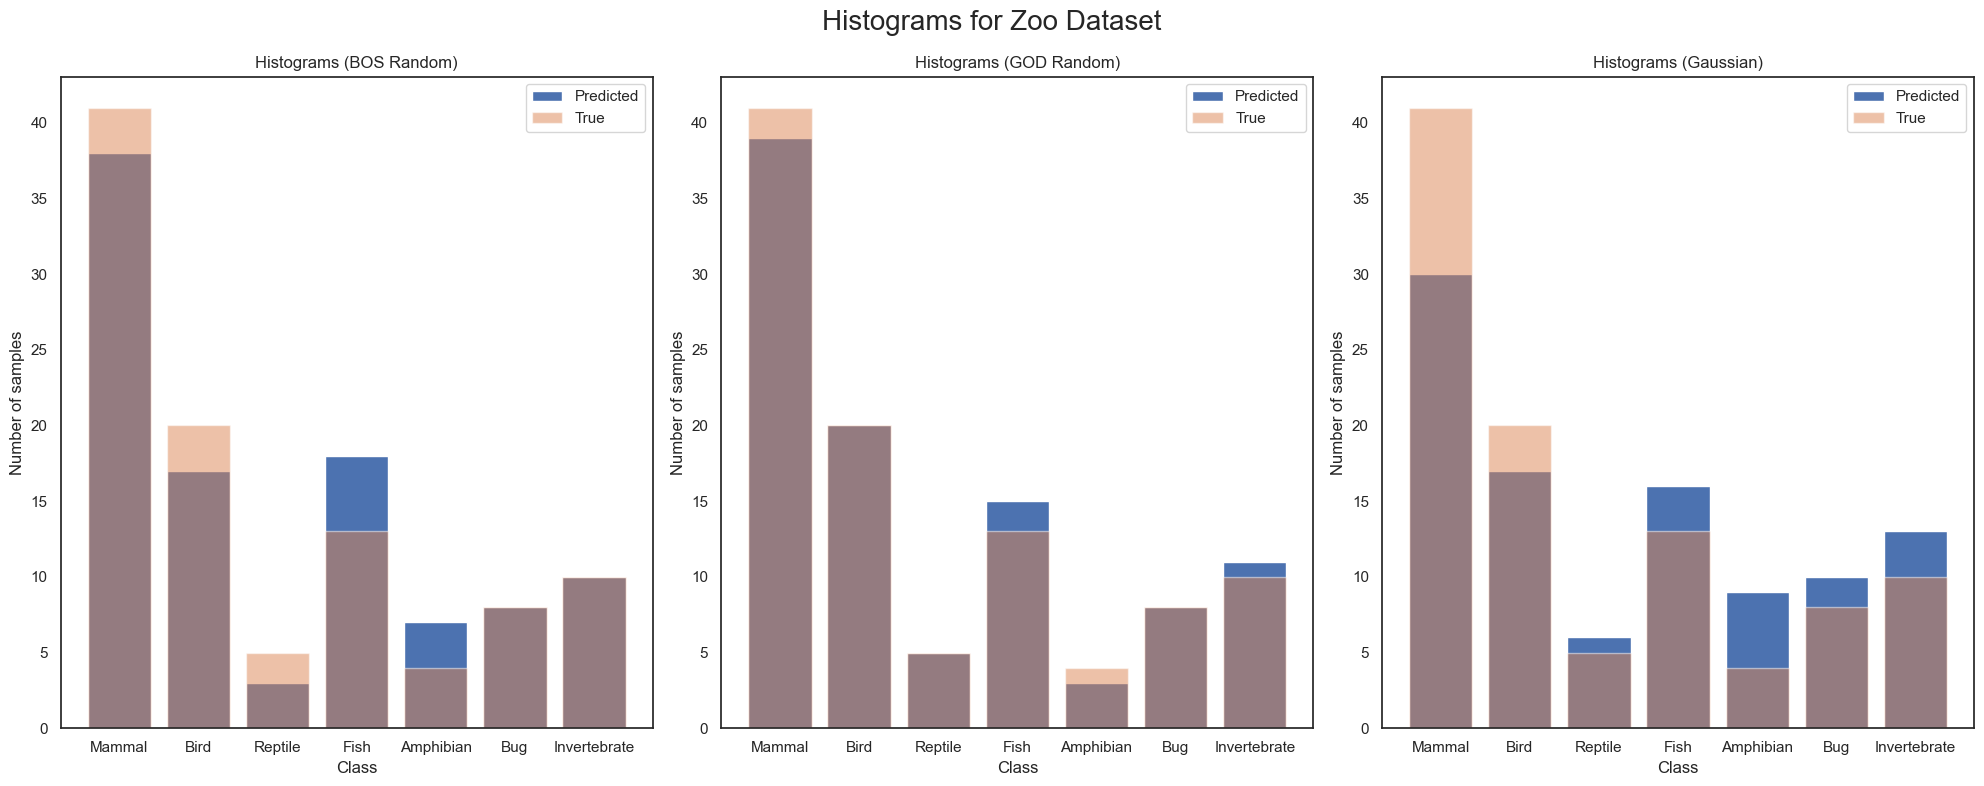

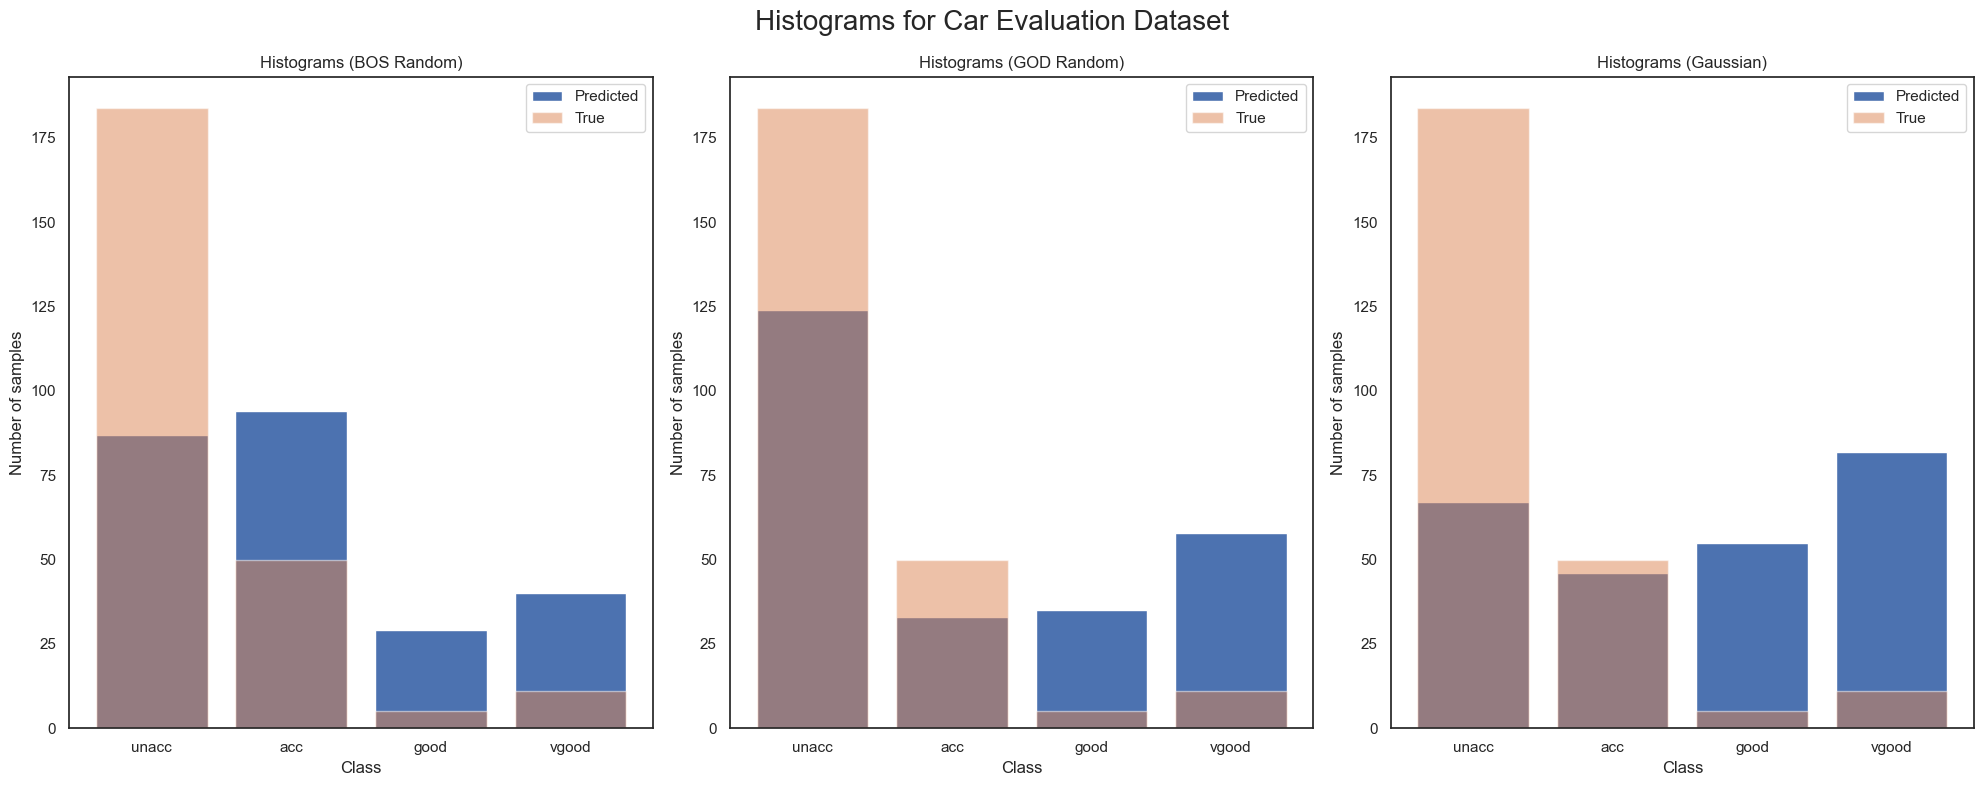

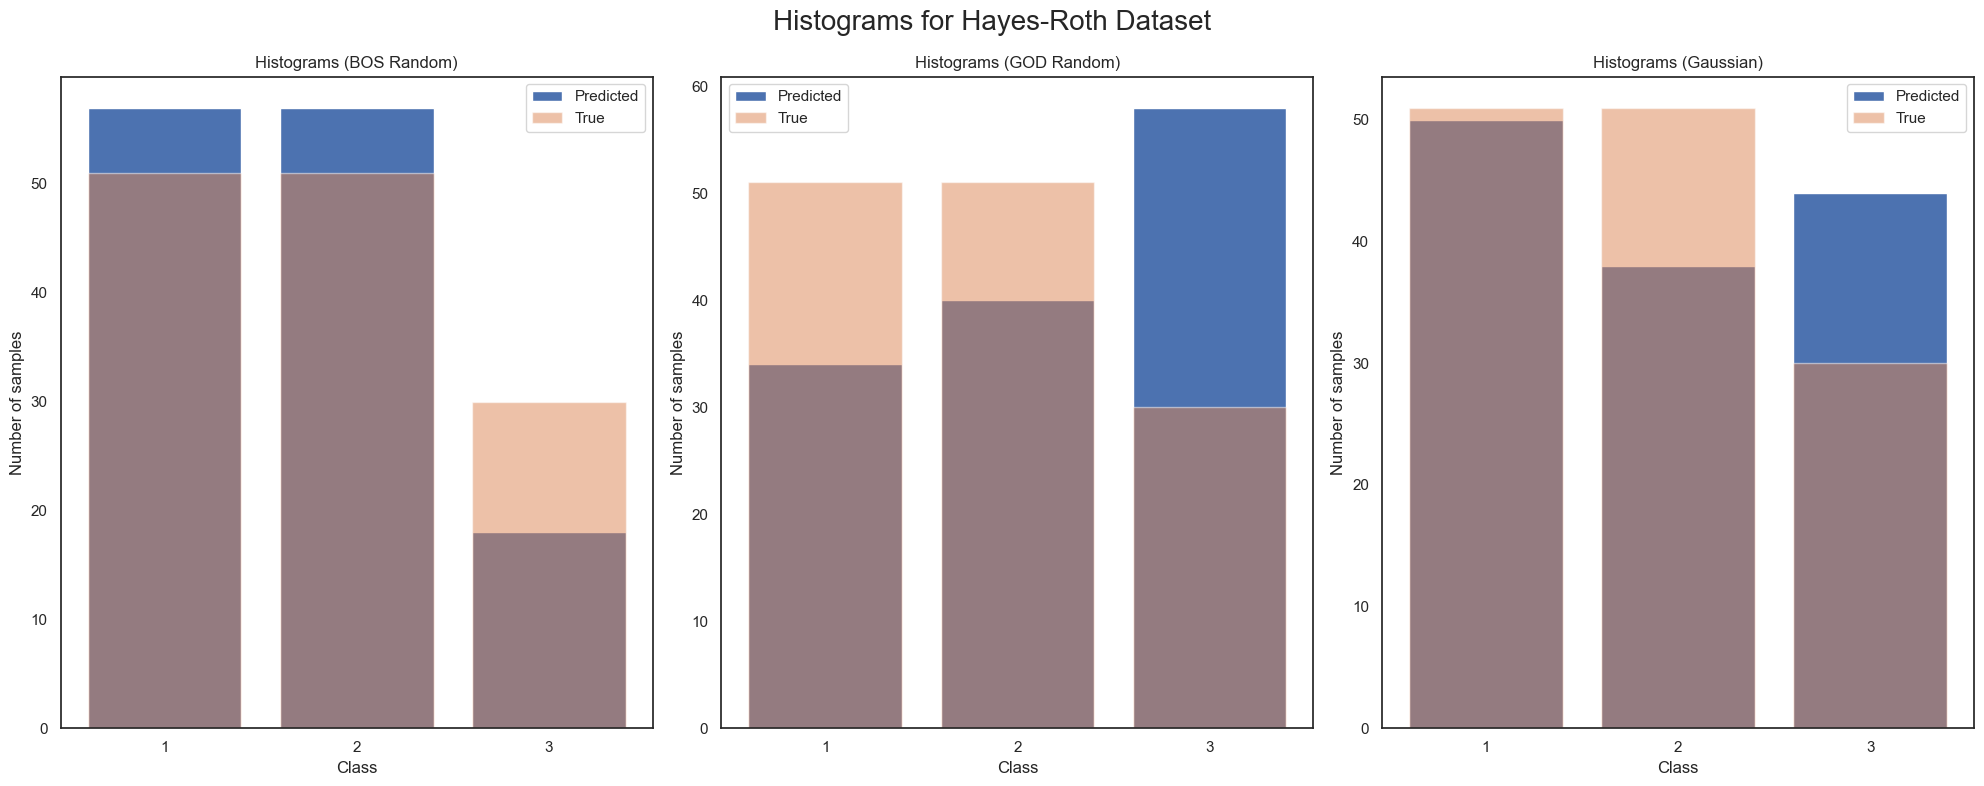

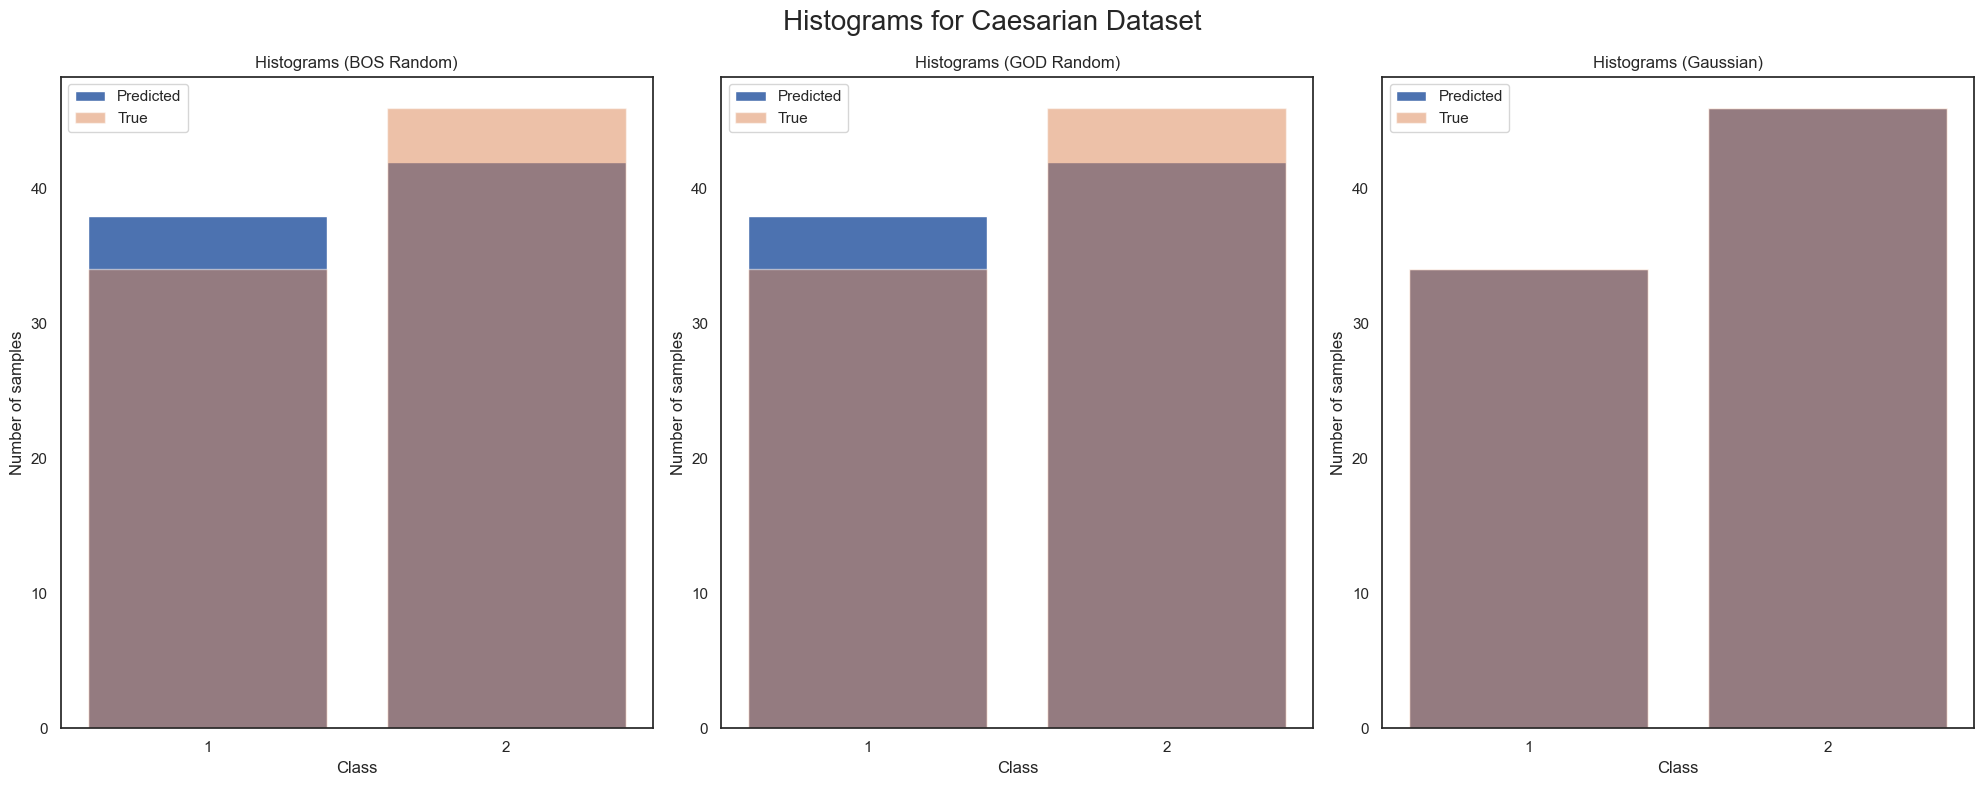

In [32]:
datasets = [animals, car, hayesroth, caesarian]
dataset_names = ["Zoo", "Car Evaluation", "Hayes-Roth", "Caesarian"]
runtypes = ["BOS Random", "GOD Random", "Gaussian"]

for i, dataset in enumerate(datasets):
    fig = plt.figure(figsize=(20, 8))
    for j, runtype in enumerate(runtypes[:]):
        plt.subplot(1, len(runtypes), j+1)
        dataset.plot_histograms(runtype=runtypes[j], show=False)
    
    fig.suptitle(f"Histograms for {dataset_names[i]} Dataset", fontsize=20)
    # fig.savefig(f"../figs/histograms_{dataset_names[i].lower().replace(' ', '_')}.png", dpi=300)

    plt.tight_layout()
    plt.show()